# 客户流失项目

## 调包

In [192]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import TransactionEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

from sklearn.decomposition import PCA

import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

In [193]:
import pandas as pd
import numpy as np

## 导入数据

In [194]:
df = pd.read_csv('userlostprob.txt',sep='\t')

In [195]:
df = pd.DataFrame(df,index=None)
df.shape
df.describe()
df.info()
df.isnull().sum()

(689945, 51)

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
count,689945.000000,6.899450e+05,689945.000000,385450.000000,82915.000000,386525.000000,689148.000000,447831.000000,661312.000000,447831.000000,...,660664.000000,447831.000000,602960.000000,682274.000000,651263.000000,592818.000000,457896.000000,689945.000000,5.929100e+05,689945.000000
mean,0.274452,6.285402e+05,0.193737,5.317048,1.856094,11.710487,1.060996,0.342119,6.086366,154.179369,...,318.541812,101830.919400,0.368237,10.648278,2.253250,12049.409382,1.137476,153.702414,1.855185e+04,14.462315
std,0.446238,4.146815e+05,0.395226,38.524483,2.103862,17.251429,0.045264,0.354210,12.413225,398.456986,...,351.913035,122784.313864,0.219945,15.696682,3.538453,25601.374138,0.204789,277.807697,2.288603e+05,6.301575
min,0.000000,2.463600e+04,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.007000,0.007000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,0.000000,3.123200e+05,0.000000,2.000000,1.000000,2.000000,1.030000,0.000000,0.000000,0.000000,...,145.000000,14999.000000,0.170000,0.827000,0.127000,551.000000,1.000000,17.000000,4.710000e+02,11.000000
50%,0.000000,5.996370e+05,0.000000,3.000000,1.000000,6.000000,1.050000,0.250000,0.000000,2.000000,...,233.000000,46890.000000,0.400000,3.527000,0.627000,2848.000000,1.050000,62.000000,1.315000e+03,15.000000
75%,1.000000,8.874600e+05,0.000000,5.000000,2.000000,14.000000,1.090000,0.570000,4.000000,153.000000,...,388.000000,138953.000000,0.550000,13.327000,2.747000,10726.000000,1.210000,180.000000,3.141000e+03,20.000000
max,1.000000,2.238426e+06,1.000000,3167.000000,106.000000,711.000000,3.180000,1.000000,49.000000,13475.000000,...,43700.000000,527026.000000,0.990000,67.140000,14.507000,194386.000000,11.000000,9956.000000,9.651192e+06,23.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
label                               689945 non-null int64
sampleid                            689945 non-null int64
d                                   689945 non-null object
arrival                             689945 non-null object
iforderpv_24h                       689945 non-null int64
decisionhabit_user                  385450 non-null float64
historyvisit_7ordernum              82915 non-null float64
historyvisit_totalordernum          386525 non-null float64
hotelcr                             689148 non-null float64
ordercanceledprecent                447831 non-null float64
landhalfhours                       661312 non-null float64
ordercanncelednum                   447831 non-null float64
commentnums                         622029 non-null float64
starprefer                          464892 non-null float64
novoters                            672918 non-null float6

label                                    0
sampleid                                 0
d                                        0
arrival                                  0
iforderpv_24h                            0
decisionhabit_user                  304495
historyvisit_7ordernum              607030
historyvisit_totalordernum          303420
hotelcr                                797
ordercanceledprecent                242114
landhalfhours                        28633
ordercanncelednum                   242114
commentnums                          67916
starprefer                          225053
novoters                             17027
consuming_capacity                  226108
historyvisit_avghotelnum            302069
cancelrate                           11718
historyvisit_visit_detailpagenum    382711
delta_price1                        252799
price_sensitive                     226108
hoteluv                                797
businessrate_pre                    206049
ordernum_on

## 数据探索

### 将字段名转换为中文

In [196]:
translation = pd.read_excel('字段说明.xlsx')
df_trans = pd.DataFrame(translation)
df_trans.shape

(51, 3)

In [197]:
np.setxor1d(df.columns,df_trans.字段)
# 没有缺失或名称错误字段

array([], dtype=object)

In [198]:
def feature_translation(x):
    dic={k:v for k,v in df_trans[["字段","解释"]].values.reshape(51,2)}
    y=x.copy()
    y.columns=pd.Series(y.columns).map(dic)
    return y

df = feature_translation(df)
df.head()

,目标变量,样本id,访问日期,入住日期,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近7天用户历史订单数,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,昨日提交当前城市同入住日期的app订单数,一年内距上次访问时长,用户转化率,会话id，sid=1可认为是新访,年访问次数,访问时间点
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [199]:
df.columns

Index(['目标变量', '样本id', '访问日期', '入住日期', '24小时内是否访问订单填写页', '决策习惯：以用户为单位观察决策习惯',
       '近7天用户历史订单数', '近1年用户历史订单数', '当前酒店历史cr', '用户一年内取消订单率', '24小时内登陆时长',
       '用户一年内取消订单数', '当前酒店点评数', '星级偏好', '当前酒店评分人数', '消费能力指数',
       '近3个月用户历史日均访问酒店数', '当前酒店历史取消率', '7天内访问酒店详情页数', '用户偏好价格-24小时浏览最多酒店价格',
       '价格敏感指数', '当前酒店历史uv', '24小时历史浏览次数最多酒店商务属性指数', '用户年订单数',
       '24小时历史浏览次数最多酒店历史cr', '平均价格', '当前酒店可定最低价', '首单bu', '24小时历史浏览酒店客户评分均值',
       '用户偏好价格-24小时浏览酒店平均价格', '24小时历史浏览次数最多酒店点评数', '客户价值_近1年',
       '24小时历史浏览酒店点评数均值', '24小时内已访问次数最多酒店历史取消率', '24小时历史浏览酒店评分人数均值',
       '24小时历史浏览次数最多酒店评分人数', '客户价值', '24小时内已访问酒店价格与对手价差均值，t+1',
       '24小时内已访问次数最多酒店可订最低价', '24小时历史浏览次数最多酒店历史uv', '24小时历史浏览酒店历史uv均值',
       '24小时内已访问酒店可订最低价均值', '一年内距离上次下单时长', '24小时内已访问酒店商务属性指数均值',
       '昨日访问当前城市同入住日期的app uv数', '昨日提交当前城市同入住日期的app订单数', '一年内距上次访问时长', '用户转化率',
       '会话id，sid=1可认为是新访', '年访问次数', '访问时间点'],
      dtype='object')

In [200]:
len(df.isnull().sum()[df.isnull().sum() != 0])

44

### 查看有监督模型的目标变量是否偏斜

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x20b3e477ac8>,
 <a list of 2 Text xticklabel objects>)

2.6436202516938905

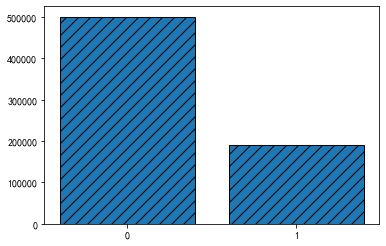

In [201]:
plt.bar([0,1],df.目标变量.value_counts(),edgecolor='k',hatch='//')
plt.xticks([0,1])
df.目标变量.value_counts()[0]/df.目标变量.value_counts()[1]
# 分类比大致2.6:1，暂时可以接受，建造模型时再判断是否需要重采样

In [202]:
# 查看数据是否有重复记录（重复id）
df.样本id.nunique() == df.shape[0]

True

### 判断缺失值字段是否删除

In [203]:
mnull = df.isnull().mean()>0.5 #设0.5位阈值，缺失超过50%的字段删除
sum(mnull)

2

In [204]:
mnull[mnull==True]

近7天用户历史订单数     True
7天内访问酒店详情页数    True
dtype: bool

In [205]:
mnull = df.isnull().mean()>0.5
df_0 = df.loc[:,~mnull]
df_0.shape

(689945, 49)

In [206]:
df_0.head()

,目标变量,样本id,访问日期,入住日期,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,昨日提交当前城市同入住日期的app订单数,一年内距上次访问时长,用户转化率,会话id，sid=1可认为是新访,年访问次数,访问时间点
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,1.04,NaN,22.0,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,1.06,NaN,0.0,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,1.05,NaN,3.0,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,1.01,NaN,2.0,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,1.00,NaN,0.0,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


### 字段分类对比

#### 新老客户占比

In [207]:
new_percent = (df_0['会话id，sid=1可认为是新访']==1).sum()/df_0.shape[0]
percent = [new_percent,1-new_percent]

([<matplotlib.patches.Wedge at 0x20b3e504a48>,
 [Text(1.1816069618097662, 0.20929641134690688, '新访客户'),
  Text(-1.0831397172376316, -0.1918550310583072, '老客户')],
 [Text(0.6892707277223636, 0.12208957328569568, '5.58%'),
  Text(-0.5908034821296171, -0.10464819875907665, '94.42%')])

Text(0.5, 1.0, '新老客户占比')

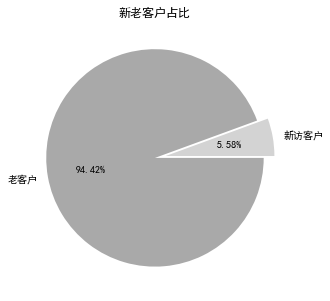

In [208]:
fig = plt.figure(figsize=(8,5))
plt.pie(percent,autopct='%.2f%%',labels=['新访客户','老客户'],colors=['lightgrey','darkgrey'],explode=[0.1,0])
plt.title('新老客户占比')

#### 访问日期与入住日期的先后关系

In [209]:
lista = []
for i in sorted(df_0['访问日期'].unique()):
    lista.append((df_0['访问日期']==i).value_counts()[1])
print(lista)

listb = []
for j in sorted(df_0['入住日期'].unique()):
    listb.append((df_0['入住日期']==j).value_counts()[1])
print(listb)

[96894, 98378, 93105, 101208, 108225, 111985, 80150]
[47850, 57772, 61417, 68052, 75067, 110982, 95820, 18743, 15567, 10731, 8785, 7923, 12419, 11761, 3697, 3707, 3505, 3569, 3938, 5246, 5871, 3304, 3871, 3564, 10197, 18120, 4979, 2350, 1815, 1985, 1458, 1657, 1225, 1408, 1038, 358, 194]


([<matplotlib.axis.XTick at 0x20b3e076d48>,
 <a list of 8 Text xticklabel objects>)

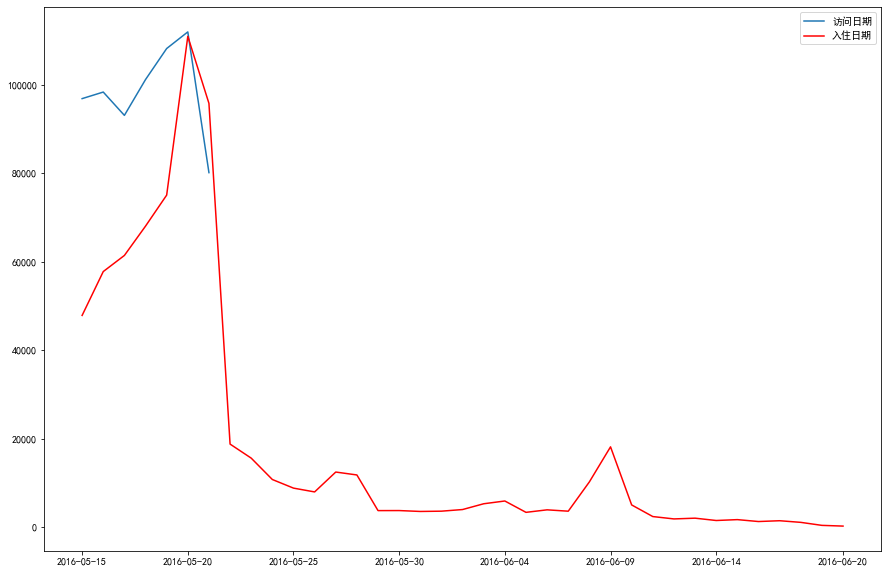

In [210]:
fig = plt.figure(figsize=(15,10))
plt.plot(sorted(df_0['访问日期'].unique()),lista)
plt.plot(sorted(df_0['入住日期'].unique()),listb,c='r')
plt.xticks(['2016-05-15','2016-05-20','2016-05-25','2016-05-30','2016-06-04','2016-06-09','2016-06-14','2016-06-20'])
plt.legend(labels=['访问日期','入住日期'])

#### 酒店转化率相似字段

<Figure size 1296x360 with 0 Axes>

(array([5.84670e+05, 1.00828e+05, 3.25100e+03, 2.40000e+02, 7.50000e+01,
        1.10000e+01, 4.20000e+01, 7.00000e+00, 9.00000e+00, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 7.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([1.   , 1.109, 1.218, 1.327, 1.436, 1.545, 1.654, 1.763, 1.872,
        1.981, 2.09 , 2.199, 2.308, 2.417, 2.526, 2.635, 2.744, 2.853,
        2.962, 3.071, 3.18 ]),
 <a list of 20 Patch objects>)

([<matplotlib.axis.XTick at 0x20afac9ebc8>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, '当前酒店历史cr分布')

(array([5.22905e+05, 1.31318e+05, 5.84100e+03, 2.83000e+02, 8.70000e+01,
        5.50000e+01, 1.20000e+01, 3.30000e+01, 4.00000e+00, 4.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([1.    , 1.0975, 1.195 , 1.2925, 1.39  , 1.4875, 1.585 , 1.6825,
        1.78  , 1.8775, 1.975 , 2.0725, 2.17  , 2.2675, 2.365 , 2.4625,
        2.56  , 2.6575, 2.755 , 2.8525, 2.95  ]),
 <a list of 20 Patch objects>)

([<matplotlib.axis.XTick at 0x20a916fd9c8>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, '24小时历史浏览次数最多酒店历史cr')

(array([4.25969e+05, 2.49160e+04, 6.74300e+03, 4.00000e+01, 1.53000e+02,
        1.60000e+01, 4.00000e+01, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.00000e+00]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

([<matplotlib.axis.XTick at 0x20aa3952408>,
 <a list of 10 Text xticklabel objects>)

Text(0.5, 1.0, '用户转化率分布')

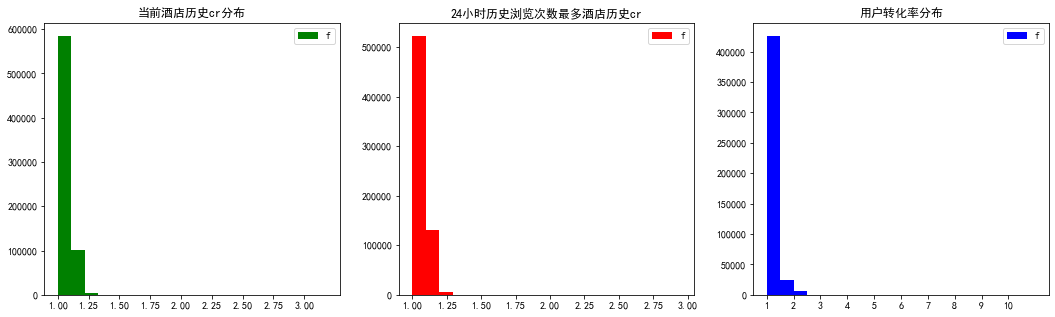

In [19]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df_0['当前酒店历史cr'].dropna(),bins=20,color='g')
plt.xticks([1,1.25,1.5,1.75,2,2.25,2.5,2.75,3])
plt.title('当前酒店历史cr分布')
plt.legend('freqency')

plt.subplot(132)
plt.hist(df_0['24小时历史浏览次数最多酒店历史cr'].dropna(),bins=20,color='r')
plt.xticks([1,1.25,1.5,1.75,2,2.25,2.5,2.75,3])
plt.title('24小时历史浏览次数最多酒店历史cr')
plt.legend('freqency')

plt.subplot(133)
plt.hist(df_0['用户转化率'].dropna(),bins=20,color='b')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title('用户转化率分布')
plt.legend('freqency')

In [20]:
df[['当前酒店历史cr','24小时历史浏览次数最多酒店历史cr','用户转化率']].corr()

,当前酒店历史cr,24小时历史浏览次数最多酒店历史cr,用户转化率
当前酒店历史cr,1.000000,0.455887,0.102181
24小时历史浏览次数最多酒店历史cr,0.455887,1.000000,0.104634
用户转化率,0.102181,0.104634,1.000000


#### 订单取消相似字段

<Figure size 1296x360 with 0 Axes>

(array([170848.,   8916.,  13066.,   8965.,  13811.,  21336.,  24050.,
          8820.,  15459.,  10380.,  35318.,  12194.,   5706.,  14055.,
          4530.,   6538.,   5590.,   3496.,   7720.,  57033.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户一年内取消订单率')

(array([4.18766e+05, 2.01530e+04, 5.71300e+03, 1.77800e+03, 6.84000e+02,
        3.82000e+02, 1.03000e+02, 7.70000e+01, 4.60000e+01, 4.00000e+00,
        8.00000e+00, 6.30000e+01, 8.00000e+00, 3.00000e+00, 0.00000e+00,
        2.10000e+01, 0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+01]),
 array([    0.  ,   673.75,  1347.5 ,  2021.25,  2695.  ,  3368.75,
         4042.5 ,  4716.25,  5390.  ,  6063.75,  6737.5 ,  7411.25,
         8085.  ,  8758.75,  9432.5 , 10106.25, 10780.  , 11453.75,
        12127.5 , 12801.25, 13475.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户一年内取消订单数')

(array([  5580.,  17357.,  49339.,  48269.,  73448., 108188.,  85573.,
         61605.,  63904.,  42843.,  28719.,  19440.,   8184.,  10273.,
          4204.,   5039.,   4521.,   2722.,   2513.,  11294.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时内已访问次数最多酒店历史取消率')

(array([4.46616e+05, 1.13643e+05, 5.20570e+04, 2.81830e+04, 1.69910e+04,
        8.97000e+03, 6.33700e+03, 8.79000e+02, 1.36700e+03, 1.19200e+03,
        2.10000e+02, 1.44000e+02, 3.13000e+02, 4.62000e+02, 0.00000e+00,
        3.16000e+02, 0.00000e+00, 0.00000e+00, 1.01000e+02, 4.46000e+02]),
 array([1.000000e+00, 9.474500e+02, 1.893900e+03, 2.840350e+03,
        3.786800e+03, 4.733250e+03, 5.679700e+03, 6.626150e+03,
        7.572600e+03, 8.519050e+03, 9.465500e+03, 1.041195e+04,
        1.135840e+04, 1.230485e+04, 1.325130e+04, 1.419775e+04,
        1.514420e+04, 1.609065e+04, 1.703710e+04, 1.798355e+04,
        1.893000e+04]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店历史取消率')

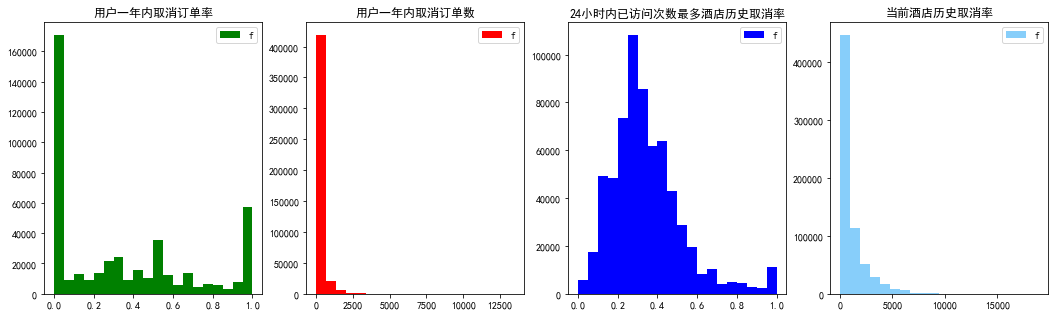

In [21]:
plt.figure(figsize=(18,5))

plt.subplot(141)
plt.hist(df_0['用户一年内取消订单率'].dropna(),bins=20,color='g')
plt.title('用户一年内取消订单率')
plt.legend('freqency')

plt.subplot(142)
plt.hist(df_0['用户一年内取消订单数'].dropna(),bins=20,color='r')
plt.title('用户一年内取消订单数')
plt.legend('freqency')

plt.subplot(143)
plt.hist(df_0['24小时内已访问次数最多酒店历史取消率'].dropna(),bins=20,color='b')
plt.title('24小时内已访问次数最多酒店历史取消率')
plt.legend('freqency')

plt.subplot(144)
plt.hist(df_0['当前酒店历史取消率'].dropna(),bins=20,color='lightskyblue')
plt.title('当前酒店历史取消率')
plt.legend('freqency')

In [22]:
df_0[['用户一年内取消订单率','用户一年内取消订单数','24小时内已访问次数最多酒店历史取消率','当前酒店历史取消率']].corr()

,用户一年内取消订单率,用户一年内取消订单数,24小时内已访问次数最多酒店历史取消率,当前酒店历史取消率
用户一年内取消订单率,1.000000,0.277654,0.036296,-0.021833
用户一年内取消订单数,0.277654,1.000000,-0.005915,0.008699
24小时内已访问次数最多酒店历史取消率,0.036296,-0.005915,1.000000,-0.195901
当前酒店历史取消率,-0.021833,0.008699,-0.195901,1.000000


#### 潜在高相关字段（一年内取消订单率vs一年内取消订单数）

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, '用户一年内取消订单率')

Text(0.5, 1.0, '用户一年内取消订单数')

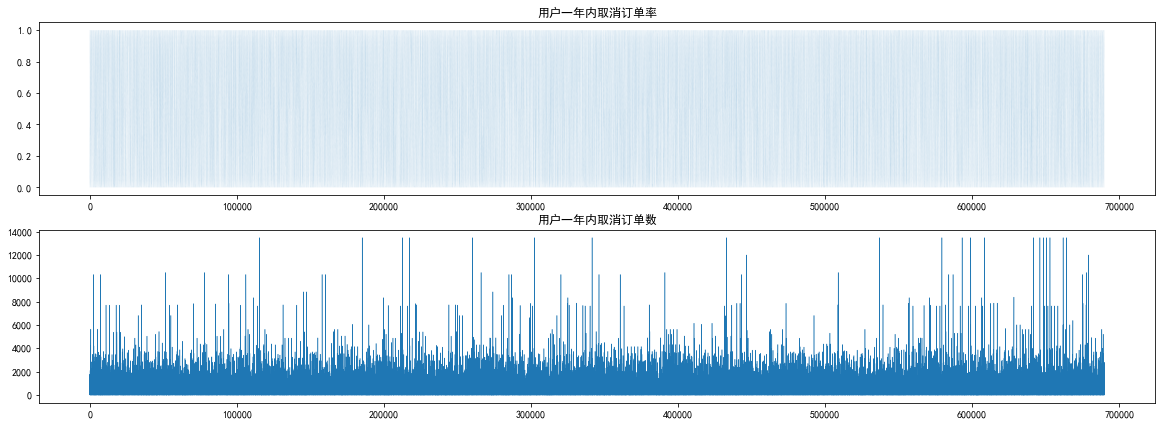

In [23]:
plt.figure(figsize=(20, 7))

plt.subplot(211)
plt.plot(df_0['用户一年内取消订单率'].dropna(),linewidth=0.01)
plt.title('用户一年内取消订单率')

plt.subplot(212)
plt.plot(df_0['用户一年内取消订单数'].dropna(),linewidth=0.5)
plt.title('用户一年内取消订单数')

In [24]:
df_0.用户一年内取消订单率.isnull().sum()
df_0.用户一年内取消订单数.isnull().sum()

242114

242114

<Figure size 864x576 with 0 Axes>

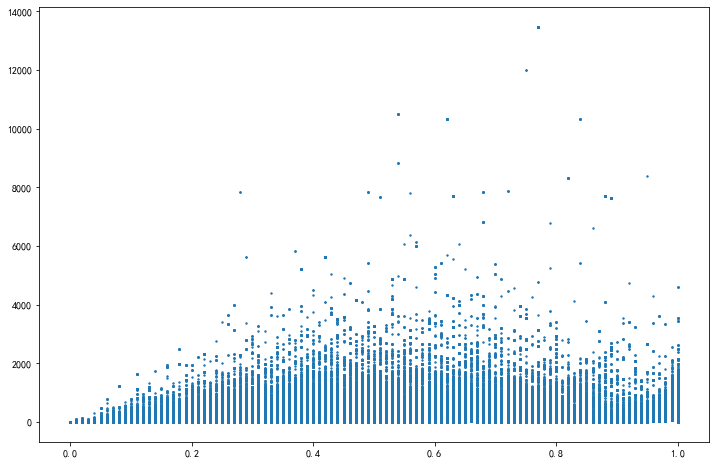

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['用户一年内取消订单率'].dropna(),df_0['用户一年内取消订单数'].dropna(),s=2)

In [26]:
# 结论：一年内取消率与一年内取消数无明显相关性

#### 酒店点评数

<Figure size 1296x360 with 0 Axes>

(array([4.70406e+05, 9.22040e+04, 3.32380e+04, 1.39390e+04, 5.45300e+03,
        2.69100e+03, 9.70000e+02, 7.00000e+02, 1.14500e+03, 2.99000e+02,
        0.00000e+00, 0.00000e+00, 4.37000e+02, 1.01000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.46000e+02]),
 array([    0.  ,  1709.45,  3418.9 ,  5128.35,  6837.8 ,  8547.25,
        10256.7 , 11966.15, 13675.6 , 15385.05, 17094.5 , 18803.95,
        20513.4 , 22222.85, 23932.3 , 25641.75, 27351.2 , 29060.65,
        30770.1 , 32479.55, 34189.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店点评数')

(array([4.37647e+05, 9.40740e+04, 3.59110e+04, 1.61830e+04, 5.89300e+03,
        3.18000e+03, 1.07200e+03, 7.20000e+02, 2.01900e+03, 3.46000e+02,
        0.00000e+00, 0.00000e+00, 6.06000e+02, 1.55000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.62000e+02]),
 array([    0.  ,  1709.45,  3418.9 ,  5128.35,  6837.8 ,  8547.25,
        10256.7 , 11966.15, 13675.6 , 15385.05, 17094.5 , 18803.95,
        20513.4 , 22222.85, 23932.3 , 25641.75, 27351.2 , 29060.65,
        30770.1 , 32479.55, 34189.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览次数最多酒店点评数')

(array([4.78474e+05, 1.16469e+05, 3.53120e+04, 1.02380e+04, 3.45300e+03,
        1.71300e+03, 7.79000e+02, 4.76000e+02, 6.76000e+02, 2.57000e+02,
        1.26000e+02, 5.30000e+01, 1.81000e+02, 6.80000e+01, 3.70000e+01,
        1.80000e+01, 9.00000e+00, 4.00000e+00, 2.00000e+00, 1.12000e+02]),
 array([    0.  ,  1709.45,  3418.9 ,  5128.35,  6837.8 ,  8547.25,
        10256.7 , 11966.15, 13675.6 , 15385.05, 17094.5 , 18803.95,
        20513.4 , 22222.85, 23932.3 , 25641.75, 27351.2 , 29060.65,
        30770.1 , 32479.55, 34189.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览酒店点评数均值')

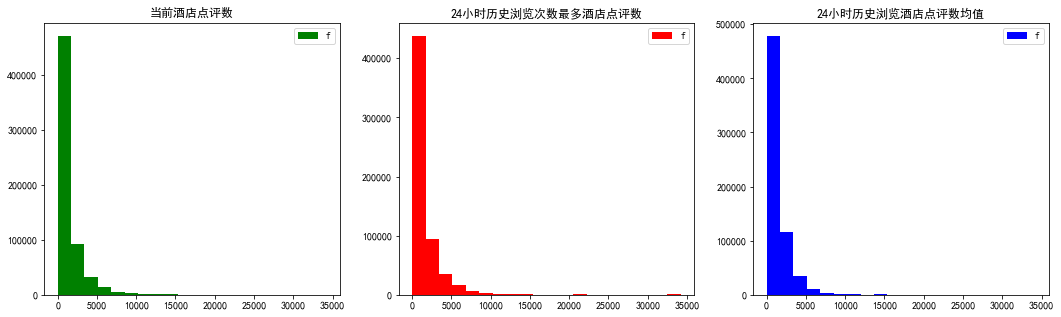

In [27]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df_0['当前酒店点评数'].dropna(),bins=20,color='g')
plt.title('当前酒店点评数')
plt.legend('freqency')

plt.subplot(132)
plt.hist(df_0['24小时历史浏览次数最多酒店点评数'].dropna(),bins=20,color='r')
plt.title('24小时历史浏览次数最多酒店点评数')
plt.legend('freqency')

plt.subplot(133)
plt.hist(df_0['24小时历史浏览酒店点评数均值'].dropna(),bins=20,color='b')
plt.title('24小时历史浏览酒店点评数均值')
plt.legend('freqency')

In [28]:
df_0[['当前酒店点评数','24小时历史浏览酒店点评数均值','24小时历史浏览次数最多酒店点评数']].corr()

,当前酒店点评数,24小时历史浏览酒店点评数均值,24小时历史浏览次数最多酒店点评数
当前酒店点评数,1.000000,0.466813,0.381434
24小时历史浏览酒店点评数均值,0.466813,1.000000,0.837862
24小时历史浏览次数最多酒店点评数,0.381434,0.837862,1.000000


In [29]:
# 存在高相关字段，后续进行处理

<Figure size 864x576 with 0 Axes>

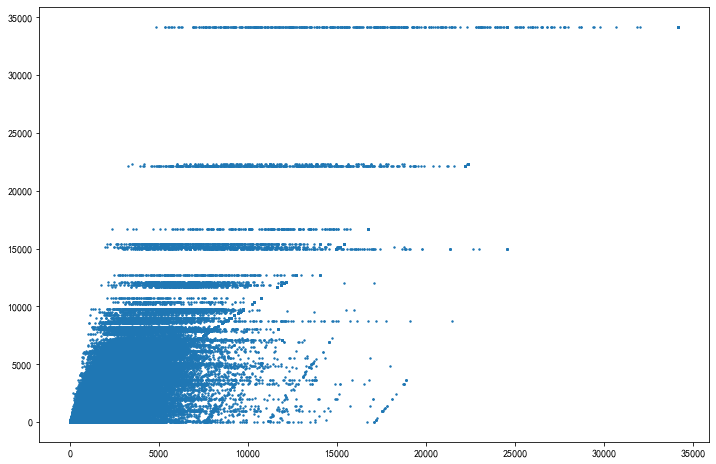

In [212]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['24小时历史浏览酒店点评数均值'],df_0['24小时历史浏览次数最多酒店点评数'],s=2)

#### 酒店历史uv

<Figure size 1296x360 with 0 Axes>

(array([4.80674e+05, 1.02448e+05, 4.57860e+04, 2.17740e+04, 1.27210e+04,
        7.67900e+03, 3.46800e+03, 3.20300e+03, 2.37500e+03, 1.15200e+03,
        8.18000e+02, 1.84200e+03, 1.51800e+03, 5.44000e+02, 4.48000e+02,
        5.14000e+02, 6.36000e+02, 5.34000e+02, 3.13000e+02, 7.01000e+02]),
 array([7.0000000e-03, 8.6137300e+01, 1.7226760e+02, 2.5839790e+02,
        3.4452820e+02, 4.3065850e+02, 5.1678880e+02, 6.0291910e+02,
        6.8904940e+02, 7.7517970e+02, 8.6131000e+02, 9.4744030e+02,
        1.0335706e+03, 1.1197009e+03, 1.2058312e+03, 1.2919615e+03,
        1.3780918e+03, 1.4642221e+03, 1.5503524e+03, 1.6364827e+03,
        1.7226130e+03]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店历史uv')

(array([439804., 102604.,  48952.,  24227.,  14266.,   9447.,   3964.,
          3476.,   2366.,   1936.,   1101.,   1786.,   1904.,    786.,
           706.,    459.,    554.,    597.,    826.,    787.]),
 array([7.0000000e-03, 8.6137300e+01, 1.7226760e+02, 2.5839790e+02,
        3.4452820e+02, 4.3065850e+02, 5.1678880e+02, 6.0291910e+02,
        6.8904940e+02, 7.7517970e+02, 8.6131000e+02, 9.4744030e+02,
        1.0335706e+03, 1.1197009e+03, 1.2058312e+03, 1.2919615e+03,
        1.3780918e+03, 1.4642221e+03, 1.5503524e+03, 1.6364827e+03,
        1.7226130e+03]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览次数最多酒店历史uv')

(array([4.26051e+05, 1.23490e+05, 5.36960e+04, 2.25120e+04, 1.07160e+04,
        6.81500e+03, 3.86800e+03, 3.00000e+03, 2.33100e+03, 2.18000e+03,
        1.52900e+03, 1.40400e+03, 1.32900e+03, 7.47000e+02, 5.63000e+02,
        2.72000e+02, 2.06000e+02, 1.53000e+02, 2.00000e+02, 1.27000e+02]),
 array([7.0000000e-03, 8.6137300e+01, 1.7226760e+02, 2.5839790e+02,
        3.4452820e+02, 4.3065850e+02, 5.1678880e+02, 6.0291910e+02,
        6.8904940e+02, 7.7517970e+02, 8.6131000e+02, 9.4744030e+02,
        1.0335706e+03, 1.1197009e+03, 1.2058312e+03, 1.2919615e+03,
        1.3780918e+03, 1.4642221e+03, 1.5503524e+03, 1.6364827e+03,
        1.7226130e+03]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览酒店历史uv均值')

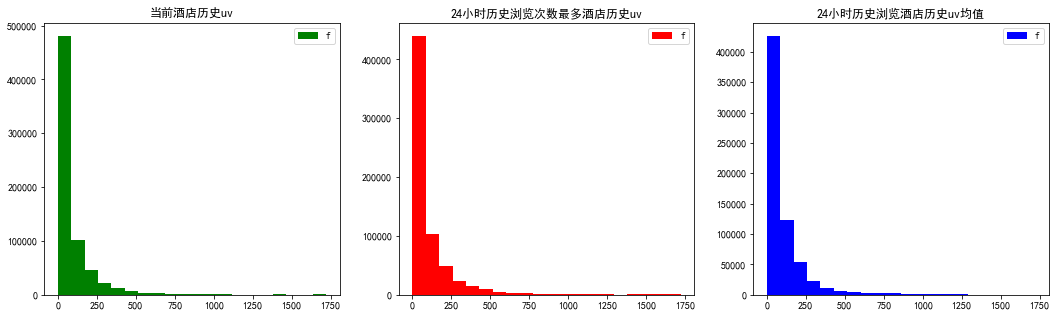

In [30]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df_0['当前酒店历史uv'].dropna(),bins=20,color='g')
plt.title('当前酒店历史uv')
plt.legend('freqency')

plt.subplot(132)
plt.hist(df_0['24小时历史浏览次数最多酒店历史uv'].dropna(),bins=20,color='r')
plt.title('24小时历史浏览次数最多酒店历史uv')
plt.legend('freqency')

plt.subplot(133)
plt.hist(df_0['24小时历史浏览酒店历史uv均值'].dropna(),bins=20,color='b')
plt.title('24小时历史浏览酒店历史uv均值')
plt.legend('freqency')

In [31]:
df_0[['当前酒店历史uv','24小时历史浏览酒店历史uv均值','24小时历史浏览次数最多酒店历史uv']].corr()

,当前酒店历史uv,24小时历史浏览酒店历史uv均值,24小时历史浏览次数最多酒店历史uv
当前酒店历史uv,1.000000,0.695502,0.605905
24小时历史浏览酒店历史uv均值,0.695502,1.000000,0.892931
24小时历史浏览次数最多酒店历史uv,0.605905,0.892931,1.000000


<Figure size 864x576 with 0 Axes>

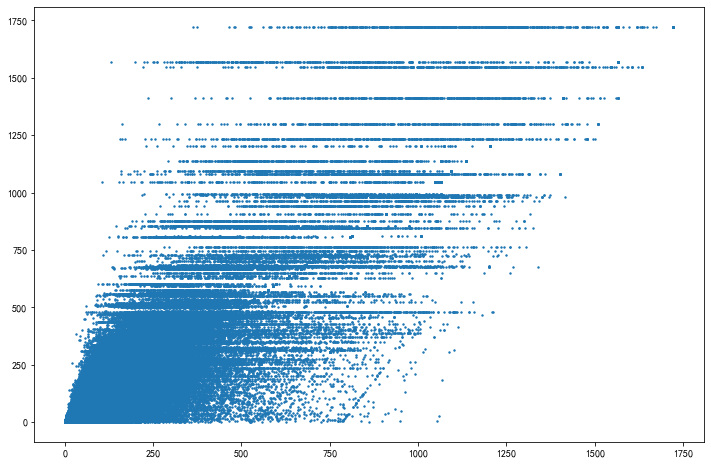

In [211]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['24小时历史浏览酒店历史uv均值'],df_0['24小时历史浏览次数最多酒店历史uv'],s=2)

#### 客户价值

<Figure size 1296x360 with 0 Axes>

(array([3.89616e+05, 4.74310e+04, 1.59300e+03, 3.04000e+02, 8.40000e+01,
        7.00000e+01, 2.00000e+01, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([-24.075  ,   7.03195,  38.1389 ,  69.24585, 100.3528 , 131.45975,
        162.5667 , 193.67365, 224.7806 , 255.88755, 286.9945 , 318.10145,
        349.2084 , 380.31535, 411.4223 , 442.52925, 473.6362 , 504.74315,
        535.8501 , 566.95705, 598.064  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '客户近1年价值')

(array([7.80000e+01, 4.27522e+05, 1.50400e+04, 1.82600e+03, 4.10000e+02,
        1.49000e+02, 6.30000e+01, 2.80000e+01, 3.90000e+01, 7.00000e+00,
        1.80000e+01, 2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([-44.313  , -12.05635,  20.2003 ,  52.45695,  84.7136 , 116.97025,
        149.2269 , 181.48355, 213.7402 , 245.99685, 278.2535 , 310.51015,
        342.7668 , 375.02345, 407.2801 , 439.53675, 471.7934 , 504.05005,
        536.3067 , 568.56335, 600.82   ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '客户价值')

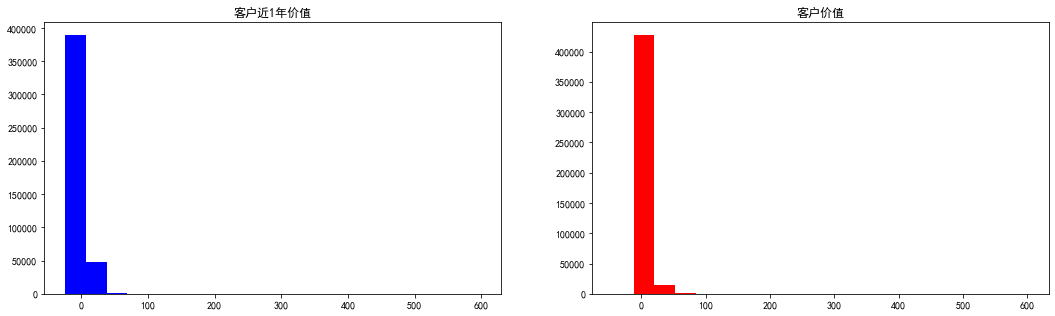

In [32]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['客户价值_近1年'].dropna(),bins=20,color='b')
plt.title('客户近1年价值')

plt.subplot(122)
plt.hist(df_0['客户价值'].dropna(),bins=20,color='r')
plt.title('客户价值')

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, '客户近1年价值')

Text(0.5, 1.0, '客户价值')

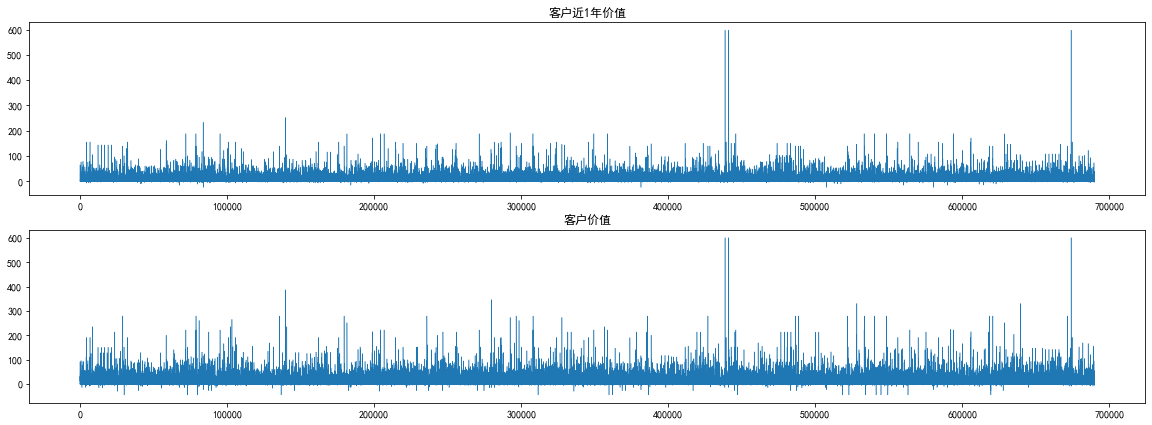

In [33]:
plt.figure(figsize=(20, 7))

plt.subplot(211)
plt.plot(df_0['客户价值_近1年'].dropna(),linewidth=0.5)
plt.title('客户近1年价值')

plt.subplot(212)
plt.plot(df_0['客户价值'].dropna(),linewidth=0.5)
plt.title('客户价值')

In [34]:
df_0[['客户价值_近1年','客户价值']].corr()

,客户价值_近1年,客户价值
客户价值_近1年,1.000000,0.853066
客户价值,0.853066,1.000000


In [35]:
# 存在高相关字段

<Figure size 864x576 with 0 Axes>

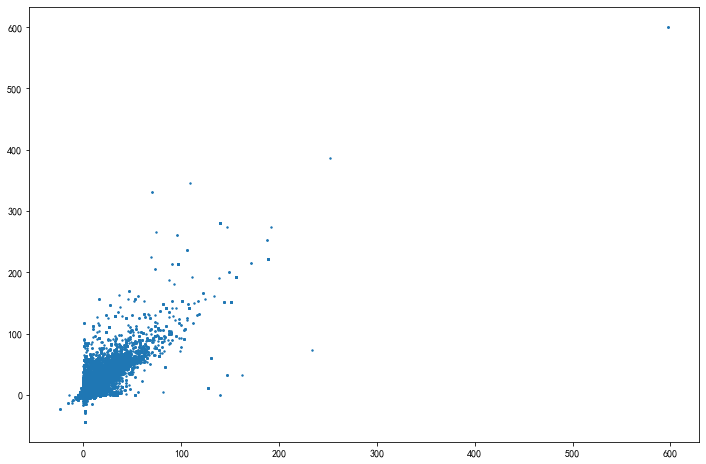

In [217]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['客户价值_近1年'],df_0['客户价值'],s=2)

#### 历史订单数

<Figure size 1296x360 with 0 Axes>

(array([3.60967e+05, 1.97710e+04, 4.14000e+03, 9.64000e+02, 4.17000e+02,
        1.18000e+02, 9.10000e+01, 2.70000e+01, 2.00000e+01, 4.00000e+00,
        0.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  1. ,  36.5,  72. , 107.5, 143. , 178.5, 214. , 249.5, 285. ,
        320.5, 356. , 391.5, 427. , 462.5, 498. , 533.5, 569. , 604.5,
        640. , 675.5, 711. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '近1年用户历史订单数')

(array([4.18598e+05, 2.25980e+04, 4.80300e+03, 1.06000e+03, 4.66000e+02,
        1.37000e+02, 9.10000e+01, 4.70000e+01, 2.10000e+01, 4.00000e+00,
        0.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  1. ,  36.5,  72. , 107.5, 143. , 178.5, 214. , 249.5, 285. ,
        320.5, 356. , 391.5, 427. , 462.5, 498. , 533.5, 569. , 604.5,
        640. , 675.5, 711. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户年订单数')

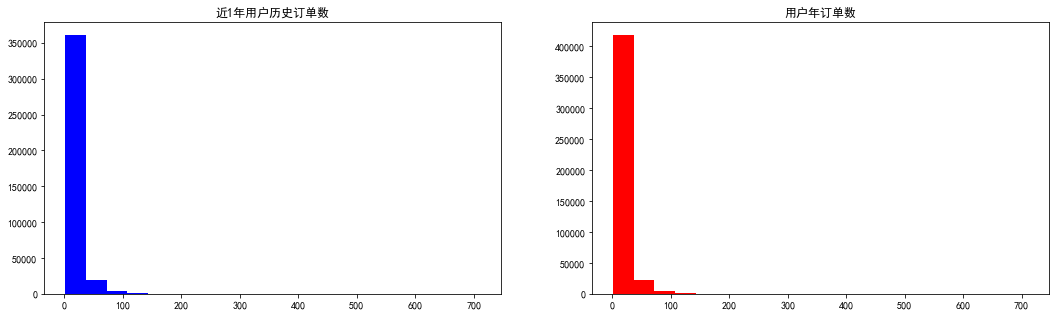

In [36]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['近1年用户历史订单数'].dropna(),bins=20,color='b')
plt.title('近1年用户历史订单数')

plt.subplot(122)
plt.hist(df_0['用户年订单数'].dropna(),bins=20,color='r')
plt.title('用户年订单数')

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, '近1年用户历史订单数')

Text(0.5, 1.0, '用户年订单数')

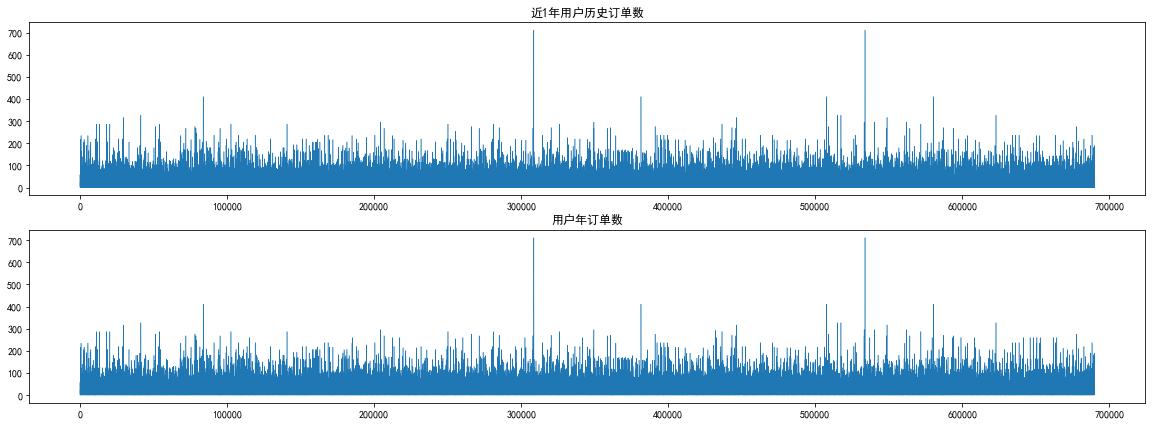

In [37]:
plt.figure(figsize=(20, 7))

plt.subplot(211)
plt.plot(df_0['近1年用户历史订单数'].dropna(),linewidth=0.5)
plt.title('近1年用户历史订单数')

plt.subplot(212)
plt.plot(df_0['用户年订单数'].dropna(),linewidth=0.5)
plt.title('用户年订单数')

In [38]:
df_0[['近1年用户历史订单数','用户年订单数']].corr()

,近1年用户历史订单数,用户年订单数
近1年用户历史订单数,1.0,1.0
用户年订单数,1.0,1.0


<Figure size 864x576 with 0 Axes>

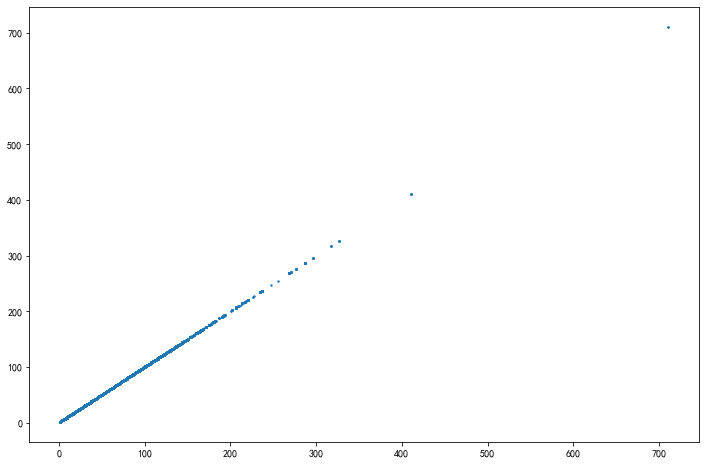

In [218]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['近1年用户历史订单数'],df_0['用户年订单数'],s=2)

In [39]:
# 字段完全正相关，可删除其一

In [40]:
df_0.drop(axis=1,labels='用户年订单数',inplace=True)
df_0.shape

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(689945, 48)

#### app uv数

<Figure size 1296x360 with 0 Axes>

(array([333419.,  87887.,  48216.,  44717.,  37196.,  17137.,  17583.,
         11859.,   8554.,   6491.,   4485.,  19102.,      0.,      0.,
             0.,  12456.,  13023.,   9771.,      0.,  10378.]),
 array([7.000000e-03, 3.363650e+00, 6.720300e+00, 1.007695e+01,
        1.343360e+01, 1.679025e+01, 2.014690e+01, 2.350355e+01,
        2.686020e+01, 3.021685e+01, 3.357350e+01, 3.693015e+01,
        4.028680e+01, 4.364345e+01, 4.700010e+01, 5.035675e+01,
        5.371340e+01, 5.707005e+01, 6.042670e+01, 6.378335e+01,
        6.714000e+01]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '昨日访问当前城市同入住日期的app uv数')

(array([340720.,  75308.,  45112.,  36502.,  27302.,  25391.,  15252.,
          9332.,   5951.,   4672.,   2758.,   8923.,   3899.,   4513.,
             0.,   3601.,  17799.,   4767.,   4573.,  14888.]),
 array([7.0000e-03, 7.3200e-01, 1.4570e+00, 2.1820e+00, 2.9070e+00,
        3.6320e+00, 4.3570e+00, 5.0820e+00, 5.8070e+00, 6.5320e+00,
        7.2570e+00, 7.9820e+00, 8.7070e+00, 9.4320e+00, 1.0157e+01,
        1.0882e+01, 1.1607e+01, 1.2332e+01, 1.3057e+01, 1.3782e+01,
        1.4507e+01]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '昨日提交当前城市同入住日期的app订单数')

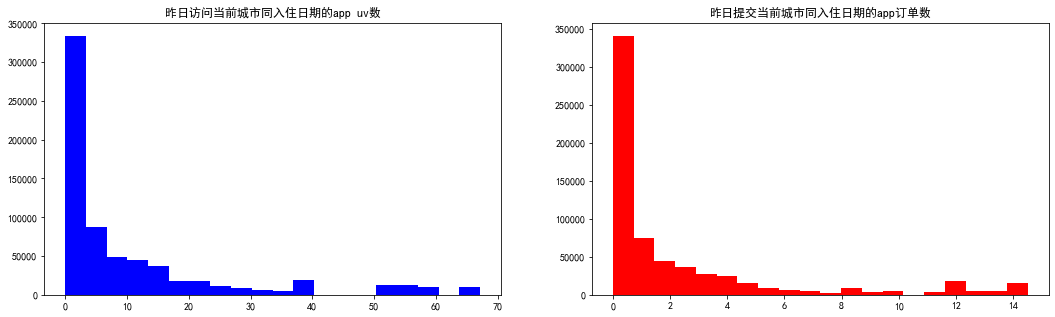

In [41]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['昨日访问当前城市同入住日期的app uv数'].dropna(),bins=20,color='b')
plt.title('昨日访问当前城市同入住日期的app uv数')

plt.subplot(122)
plt.hist(df_0['昨日提交当前城市同入住日期的app订单数'].dropna(),bins=20,color='r')
plt.title('昨日提交当前城市同入住日期的app订单数')

In [42]:
df_0[['昨日访问当前城市同入住日期的app uv数','昨日提交当前城市同入住日期的app订单数']].dropna().corr()

,昨日访问当前城市同入住日期的app uv数,昨日提交当前城市同入住日期的app订单数
昨日访问当前城市同入住日期的app uv数,1.000000,0.988433
昨日提交当前城市同入住日期的app订单数,0.988433,1.000000


<Figure size 864x576 with 0 Axes>

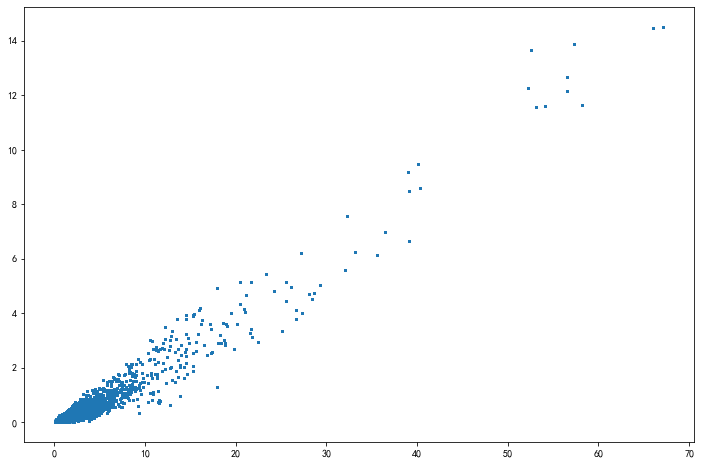

In [219]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['昨日访问当前城市同入住日期的app uv数'],df_0['昨日提交当前城市同入住日期的app订单数'],s=2)

In [43]:
df_0.drop(axis=1,labels='昨日提交当前城市同入住日期的app订单数',inplace=True)
df_0.shape

(689945, 47)

#### 消费能力指数vs价格敏感指数

<Figure size 1296x360 with 0 Axes>

(array([ 1625.,   298.,   761.,  1617.,  5975., 10616., 15616., 17217.,
        19439., 20750., 19146., 20618., 20186., 20199., 20850., 18763.,
        18886., 16870., 16779., 16046., 13647., 12886., 12355., 11430.,
        10541.,  9177.,  8443.,  7885.,  6848.,  7258.,  5856.,  5538.,
         5162.,  4920.,  4783.,  4277.,  3508.,  3073.,  3028.,  3113.,
         2446.,  2488.,  2245.,  2070.,  2215.,  1624.,  1575.,  1493.,
         1344., 20352.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

Text(0.5, 1.0, '消费能力指数')

(array([77534., 18510., 20862., 22338., 22417., 22469., 21692., 20930.,
        19566., 18123., 15680., 14579., 13390., 11923., 10681.,  9268.,
         8586.,  7458.,  7026.,  6423.,  5832.,  5398.,  4824.,  4947.,
         4233.,  3909.,  3413.,  3238.,  2989.,  2817.,  2621.,  2525.,
         2202.,  2071.,  1909.,  2038.,  1628.,  1440.,  1384.,  1244.,
         1366.,  1133.,  1221.,   929.,  1123.,   818.,   852.,  1006.,
          913., 24359.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

Text(0.5, 1.0, '价格敏感指数')

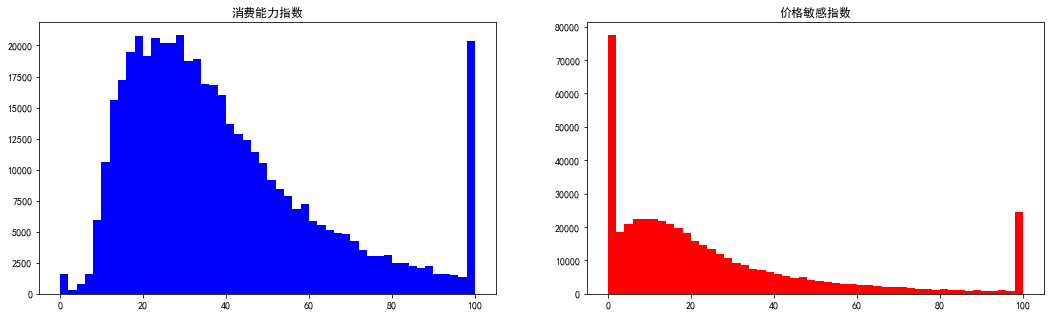

In [44]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['消费能力指数'].dropna(),bins=50,color='b')
plt.title('消费能力指数')

plt.subplot(122)
plt.hist(df_0['价格敏感指数'].dropna(),bins=50,color='r')
plt.title('价格敏感指数')

In [45]:
df_0[['消费能力指数','价格敏感指数']].dropna().corr()

,消费能力指数,价格敏感指数
消费能力指数,1.00000,0.24586
价格敏感指数,0.24586,1.00000


In [46]:
df_0['消费能力指数'].isnull().sum()
df_0['价格敏感指数'].isnull().sum()

226108

226108

In [47]:
# 相关性较弱，单缺失数据一致，可能有隐含相关性？

#### 更多用户消费水平指示

In [48]:
df_0[['消费能力指数','价格敏感指数','星级偏好','用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格']].dropna().corr()

,消费能力指数,价格敏感指数,星级偏好,用户偏好价格-24小时浏览最多酒店价格,用户偏好价格-24小时浏览酒店平均价格
消费能力指数,1.000000,0.247858,0.717766,0.251789,0.334961
价格敏感指数,0.247858,1.000000,0.036265,0.095876,0.124588
星级偏好,0.717766,0.036265,1.000000,0.156521,0.209895
用户偏好价格-24小时浏览最多酒店价格,0.251789,0.095876,0.156521,1.000000,0.778976
用户偏好价格-24小时浏览酒店平均价格,0.334961,0.124588,0.209895,0.778976,1.000000


##### 消费能力指数vs星级偏好

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, '消费能力指数')

Text(0, 0.5, '星级偏好')

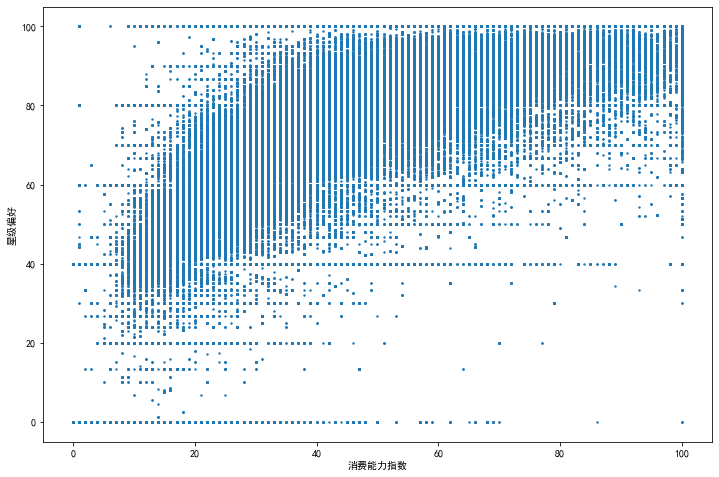

In [221]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['消费能力指数'],df_0['星级偏好'],s=2)
plt.xlabel('消费能力指数')
plt.ylabel('星级偏好')

In [50]:
# 星级偏好与消费能力指数之间具有强相关，且大致呈线性关系

##### 用户偏好价格：24小时浏览酒店价格vs平均价格

<Figure size 1296x360 with 0 Axes>

(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+00, 0.00000e+00, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        7.00000e+00, 2.20000e+01, 1.51000e+02, 2.67351e+05, 1.69600e+05]),
 array([-99879.  , -94615.15, -89351.3 , -84087.45, -78823.6 , -73559.75,
        -68295.9 , -63032.05, -57768.2 , -52504.35, -47240.5 , -41976.65,
        -36712.8 , -31448.95, -26185.1 , -20921.25, -15657.4 , -10393.55,
         -5129.7 ,    134.15,   5398.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户偏好价格-24小时浏览最多酒店价格')

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        3.00000e+00, 6.00000e+00, 9.00000e+00, 9.00000e+00, 1.70000e+01,
        1.07000e+02, 7.11000e+02, 3.60509e+05, 7.62700e+04, 9.90000e+01]),
 array([-43344. , -40921.1, -38498.2, -36075.3, -33652.4, -31229.5,
        -28806.6, -26383.7, -23960.8, -21537.9, -19115. , -16692.1,
        -14269.2, -11846.3,  -9423.4,  -7000.5,  -4577.6,  -2154.7,
           268.2,   2691.1,   5114. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '用户偏好价格-24小时浏览酒店平均价格')

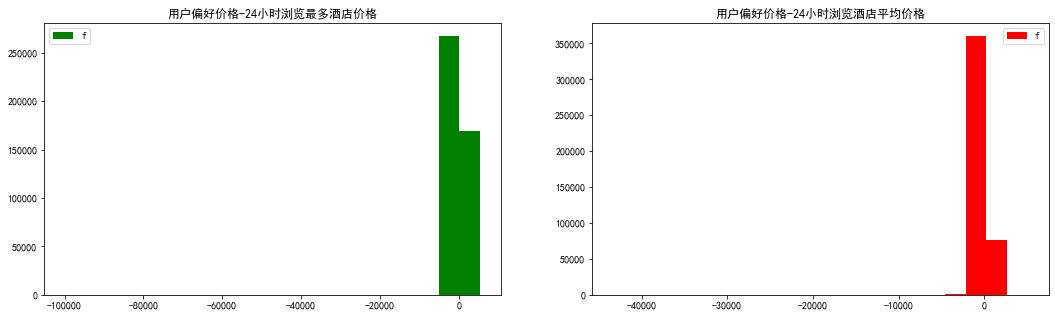

In [51]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['用户偏好价格-24小时浏览最多酒店价格'].dropna(),bins=20,color='g')
plt.title('用户偏好价格-24小时浏览最多酒店价格')
plt.legend('freqency')

plt.subplot(122)
plt.hist(df_0['用户偏好价格-24小时浏览酒店平均价格'].dropna(),bins=20,color='r')
plt.title('用户偏好价格-24小时浏览酒店平均价格')
plt.legend('freqency')

<Figure size 1440x504 with 0 Axes>

Text(0.5, 1.0, '用户偏好价格-24小时浏览最多酒店价格')

Text(0.5, 1.0, '用户偏好价格-24小时浏览酒店平均价格')

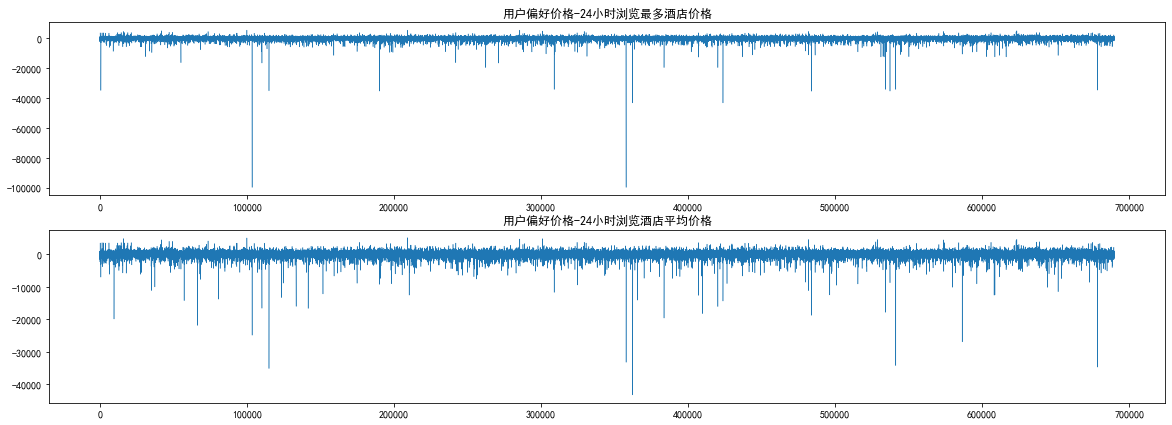

In [52]:
plt.figure(figsize=(20, 7))

plt.subplot(211)
plt.plot(df_0['用户偏好价格-24小时浏览最多酒店价格'].dropna(),linewidth=0.5)
plt.title('用户偏好价格-24小时浏览最多酒店价格')

plt.subplot(212)
plt.plot(df_0['用户偏好价格-24小时浏览酒店平均价格'].dropna(),linewidth=0.5)
plt.title('用户偏好价格-24小时浏览酒店平均价格')

In [53]:
df_0[['用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格']].dropna().corr()

,用户偏好价格-24小时浏览最多酒店价格,用户偏好价格-24小时浏览酒店平均价格
用户偏好价格-24小时浏览最多酒店价格,1.000000,0.781225
用户偏好价格-24小时浏览酒店平均价格,0.781225,1.000000


<Figure size 864x576 with 0 Axes>

Text(0.5, 0, '用户偏好价格-24小时浏览最多酒店价格')

Text(0, 0.5, '用户偏好价格-24小时浏览酒店平均价格')

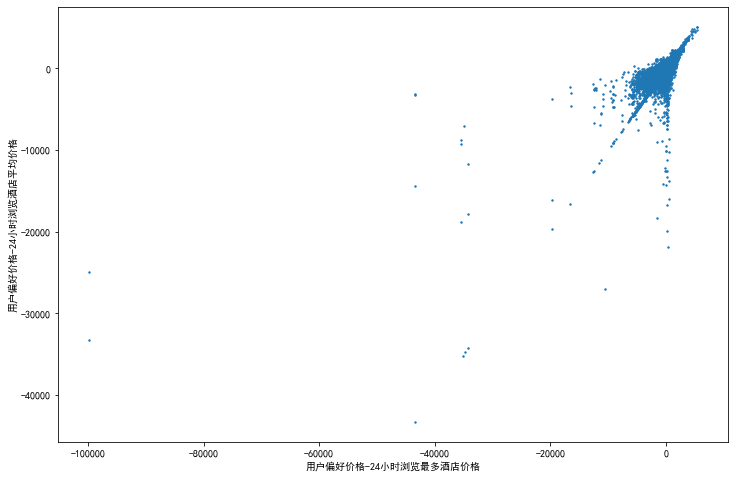

In [222]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['用户偏好价格-24小时浏览最多酒店价格'],df_0['用户偏好价格-24小时浏览酒店平均价格'],s=2)
plt.xlabel('用户偏好价格-24小时浏览最多酒店价格')
plt.ylabel('用户偏好价格-24小时浏览酒店平均价格')

In [55]:
# 高相关且相关性呈类箭头状，有线性特征

#### 酒店价格指标

<Figure size 1296x360 with 0 Axes>

(array([2.01704e+05, 1.82294e+05, 5.03390e+04, 1.44510e+04, 4.99800e+03,
        1.98600e+03, 7.35000e+02, 3.73000e+02, 1.61000e+02, 8.90000e+01,
        2.50000e+01, 6.90000e+01, 9.00000e+00, 1.00000e+00, 1.00000e+01,
        3.00000e+00, 3.00000e+00, 5.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([1.0000e+00, 3.2010e+02, 6.3920e+02, 9.5830e+02, 1.2774e+03,
        1.5965e+03, 1.9156e+03, 2.2347e+03, 2.5538e+03, 2.8729e+03,
        3.1920e+03, 3.5111e+03, 3.8302e+03, 4.1493e+03, 4.4684e+03,
        4.7875e+03, 5.1066e+03, 5.4257e+03, 5.7448e+03, 6.0639e+03,
        6.3830e+03]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '平均价格')

(array([6.87374e+05, 4.39000e+02, 7.60000e+01, 1.30000e+01, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 1.40000e+01, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e+00]),
 array([-3.000000e+00,  4.997150e+03,  9.997300e+03,  1.499745e+04,
         1.999760e+04,  2.499775e+04,  2.999790e+04,  3.499805e+04,
         3.999820e+04,  4.499835e+04,  4.999850e+04,  5.499865e+04,
         5.999880e+04,  6.499895e+04,  6.999910e+04,  7.499925e+04,
         7.999940e+04,  8.499955e+04,  8.999970e+04,  9.499985e+04,
         1.000000e+05]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店可定最低价')

(array([1.00000e+00, 0.00000e+00, 1.03050e+04, 2.05300e+03, 1.33530e+04,
        3.76500e+03, 2.26360e+04, 8.38000e+02, 1.21500e+03, 4.70400e+03,
        7.45300e+03, 9.95930e+04, 2.03851e+05, 0.00000e+00, 3.09000e+02,
        7.86000e+02, 3.41100e+03, 2.40000e+01, 7.50000e+01, 2.62100e+03]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '首单bu')

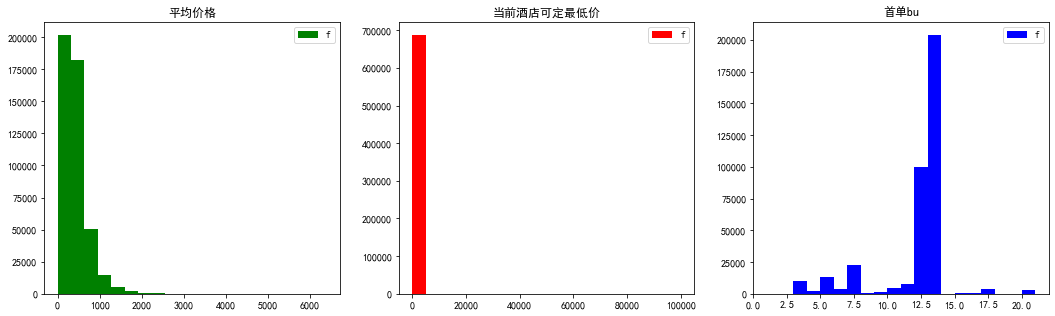

In [56]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df_0['平均价格'].dropna(),bins=20,color='g')
plt.title('平均价格')
plt.legend('freqency')

plt.subplot(132)
plt.hist(df_0['当前酒店可定最低价'].dropna(),bins=20,color='r')
plt.title('当前酒店可定最低价')
plt.legend('freqency')

plt.subplot(133)
plt.hist(df_0['首单bu'].dropna(),bins=20,color='b')
plt.title('首单bu')
plt.legend('freqency')

In [225]:
df[['平均价格','当前酒店可定最低价','首单bu']].corr()

,平均价格,当前酒店可定最低价,首单bu
平均价格,1.000000,0.193097,-0.093899
当前酒店可定最低价,0.193097,1.000000,-0.017742
首单bu,-0.093899,-0.017742,1.000000


In [57]:
df_rest1 = df_0[['24小时内是否访问订单填写页',
'决策习惯：以用户为单位观察决策习惯',
'24小时内登陆时长',
'近3个月用户历史日均访问酒店数']]
df_rest1.corr()

,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,24小时内登陆时长,近3个月用户历史日均访问酒店数
24小时内是否访问订单填写页,1.000000,-0.002308,0.225485,-0.002681
决策习惯：以用户为单位观察决策习惯,-0.002308,1.000000,0.005327,0.937761
24小时内登陆时长,0.225485,0.005327,1.000000,0.005882
近3个月用户历史日均访问酒店数,-0.002681,0.937761,0.005882,1.000000


In [58]:
df_rest2 = df_0[['24小时内已访问酒店价格与对手价差均值，t+1',
'24小时内已访问次数最多酒店可订最低价',
'24小时内已访问酒店可订最低价均值',
'24小时内已访问酒店商务属性指数均值',
'24小时内已访问酒店商务属性指数均值']]
df_rest2.corr()

,24小时内已访问酒店价格与对手价差均值，t+1,24小时内已访问次数最多酒店可订最低价,24小时内已访问酒店可订最低价均值,24小时内已访问酒店商务属性指数均值,24小时内已访问酒店商务属性指数均值
24小时内已访问酒店价格与对手价差均值，t+1,1.000000,0.038297,0.052107,0.061082,0.061082
24小时内已访问次数最多酒店可订最低价,0.038297,1.000000,0.767423,-0.094789,-0.094789
24小时内已访问酒店可订最低价均值,0.052107,0.767423,1.000000,-0.137378,-0.137378
24小时内已访问酒店商务属性指数均值,0.061082,-0.094789,-0.137378,1.000000,1.000000
24小时内已访问酒店商务属性指数均值,0.061082,-0.094789,-0.137378,1.000000,1.000000


##### 24小时内已访问次数最多酒店可订最低价vs最低价均值

<Figure size 864x576 with 0 Axes>

[0, 20000, 0, 20000]

Text(0.5, 0, '24小时内已访问次数最多酒店可订最低价')

Text(0, 0.5, '24小时内已访问酒店可订最低价均值')

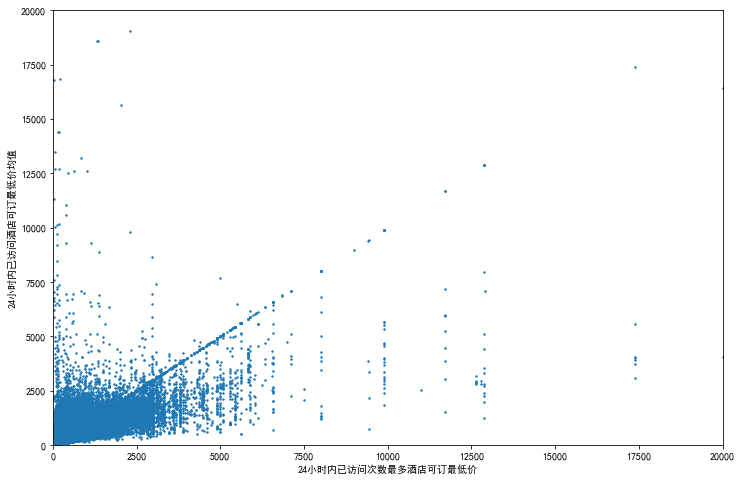

In [223]:
plt.figure(figsize=(12,8))
plt.scatter(df_0['24小时内已访问次数最多酒店可订最低价'],df_0['24小时内已访问酒店可订最低价均值'],s=2)
plt.axis([0,20000,0,20000])
plt.xlabel('24小时内已访问次数最多酒店可订最低价')
plt.ylabel('24小时内已访问酒店可订最低价均值')

In [60]:
# 相关性呈线性特征

## 数据清洗

In [61]:
target = df_0.pop('目标变量')

### 删除或转码无效字段

In [62]:
df_0.drop(axis=1,labels=['样本id'],inplace=True)

In [63]:
ifnew = []

for i in df_0['会话id，sid=1可认为是新访']:
    if i != 1:
        inw = 0
    else:
        inw = 1
    
    ifnew.append(inw)
    
df_0['是否为新访用户'] = pd.Series(ifnew)
df_0.drop(axis=1, labels=['会话id，sid=1可认为是新访'], inplace=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### 相关信息字段合并

In [64]:
df_0['访问日期']=pd.to_datetime(df_0['访问日期'])
df_0['入住日期']=pd.to_datetime(df_0['入住日期'])
# 生成提前预定时间列
df_0['提前预定天数'] = (df_0['入住日期']-df_0['访问日期']).dt.days
df_0['提前预定天数'] = df_0['提前预定天数'].astype('float')

## 删除列
df_0 = df_0.drop(labels=['访问日期','入住日期'],axis=1)
df_0.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,星级偏好,当前酒店评分人数,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,一年内距上次访问时长,用户转化率,年访问次数,访问时间点,是否为新访用户,提前预定天数
0,0,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,1933.0,...,615.0,NaN,0.29,12.880,NaN,NaN,NaN,12,0,0.0
1,0,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,6852.0,...,513.0,NaN,0.53,17.933,NaN,NaN,NaN,14,0,0.0
2,0,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,367.0,...,382.0,NaN,0.60,3.993,NaN,NaN,NaN,19,0,1.0
3,0,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,NaN,...,203.0,NaN,0.18,3.220,NaN,NaN,NaN,16,0,0.0
4,0,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,21,1,1.0


### 字段相关性再次筛选

#### 用户行为字段

In [65]:
df_0.columns

Index(['24小时内是否访问订单填写页', '决策习惯：以用户为单位观察决策习惯', '近1年用户历史订单数', '当前酒店历史cr',
       '用户一年内取消订单率', '24小时内登陆时长', '用户一年内取消订单数', '当前酒店点评数', '星级偏好', '当前酒店评分人数',
       '消费能力指数', '近3个月用户历史日均访问酒店数', '当前酒店历史取消率', '用户偏好价格-24小时浏览最多酒店价格',
       '价格敏感指数', '当前酒店历史uv', '24小时历史浏览次数最多酒店商务属性指数', '24小时历史浏览次数最多酒店历史cr',
       '平均价格', '当前酒店可定最低价', '首单bu', '24小时历史浏览酒店客户评分均值', '用户偏好价格-24小时浏览酒店平均价格',
       '24小时历史浏览次数最多酒店点评数', '客户价值_近1年', '24小时历史浏览酒店点评数均值',
       '24小时内已访问次数最多酒店历史取消率', '24小时历史浏览酒店评分人数均值', '24小时历史浏览次数最多酒店评分人数', '客户价值',
       '24小时内已访问酒店价格与对手价差均值，t+1', '24小时内已访问次数最多酒店可订最低价', '24小时历史浏览次数最多酒店历史uv',
       '24小时历史浏览酒店历史uv均值', '24小时内已访问酒店可订最低价均值', '一年内距离上次下单时长',
       '24小时内已访问酒店商务属性指数均值', '昨日访问当前城市同入住日期的app uv数', '一年内距上次访问时长', '用户转化率',
       '年访问次数', '访问时间点', '是否为新访用户', '提前预定天数'],
      dtype='object')

In [66]:
df_customerbehavior = df_0[[ '24小时内是否访问订单填写页', 
'决策习惯：以用户为单位观察决策习惯','近1年用户历史订单数',
'用户一年内取消订单率', '24小时内登陆时长', '用户一年内取消订单数',  
'星级偏好','消费能力指数', '近3个月用户历史日均访问酒店数','用户偏好价格-24小时浏览最多酒店价格',
'价格敏感指数','24小时历史浏览酒店客户评分均值', '用户偏好价格-24小时浏览酒店平均价格',
'客户价值_近1年','客户价值','一年内距离上次下单时长', '一年内距上次访问时长', '用户转化率', 
'年访问次数', '访问时间点','是否为新访用户','提前预定天数']]#用户行为字段

In [67]:
df_customerbehavior.head()

,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,星级偏好,消费能力指数,近3个月用户历史日均访问酒店数,用户偏好价格-24小时浏览最多酒店价格,...,用户偏好价格-24小时浏览酒店平均价格,客户价值_近1年,客户价值,一年内距离上次下单时长,一年内距上次访问时长,用户转化率,年访问次数,访问时间点,是否为新访用户,提前预定天数
0,0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0,0.0
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,0.0
2,0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,0,1.0
3,0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,0,0.0
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1,1.0


In [68]:
df_hotelbehavior = df_0[np.setxor1d(df_customerbehavior.columns,df_0.columns)]
df_hotelbehavior.head()

,24小时内已访问次数最多酒店历史取消率,24小时内已访问次数最多酒店可订最低价,24小时内已访问酒店价格与对手价差均值，t+1,24小时内已访问酒店可订最低价均值,24小时内已访问酒店商务属性指数均值,24小时历史浏览次数最多酒店历史cr,24小时历史浏览次数最多酒店历史uv,24小时历史浏览次数最多酒店商务属性指数,24小时历史浏览次数最多酒店点评数,24小时历史浏览次数最多酒店评分人数,...,24小时历史浏览酒店评分人数均值,平均价格,当前酒店历史cr,当前酒店历史uv,当前酒店历史取消率,当前酒店可定最低价,当前酒店点评数,当前酒店评分人数,昨日访问当前城市同入住日期的app uv数,首单bu
0,0.03,46.0,29.0,615.0,0.29,1.03,58.027,0.25,724.0,1249.0,...,1335.0,NaN,1.04,102.607,1261.0,49.0,1089.0,1933.0,12.880,NaN
1,0.21,111.0,-56.0,513.0,0.53,1.07,249.347,0.51,5610.0,7829.0,...,5430.0,NaN,1.06,278.373,3205.0,619.0,5612.0,6852.0,17.933,NaN
2,0.52,413.0,8.0,382.0,0.60,1.12,133.093,0.61,4721.0,7324.0,...,5353.0,NaN,1.05,16.133,194.0,312.0,256.0,367.0,3.993,NaN
3,0.53,188.0,-7.0,203.0,0.18,1.01,4.600,NaN,41.0,81.0,...,1004.0,NaN,1.01,1.780,3.0,198.0,NaN,NaN,3.220,NaN
4,1.00,NaN,-5.0,84.0,NaN,1.03,0.213,NaN,NaN,NaN,...,1.0,NaN,1.00,0.073,NaN,NaN,NaN,NaN,0.013,NaN


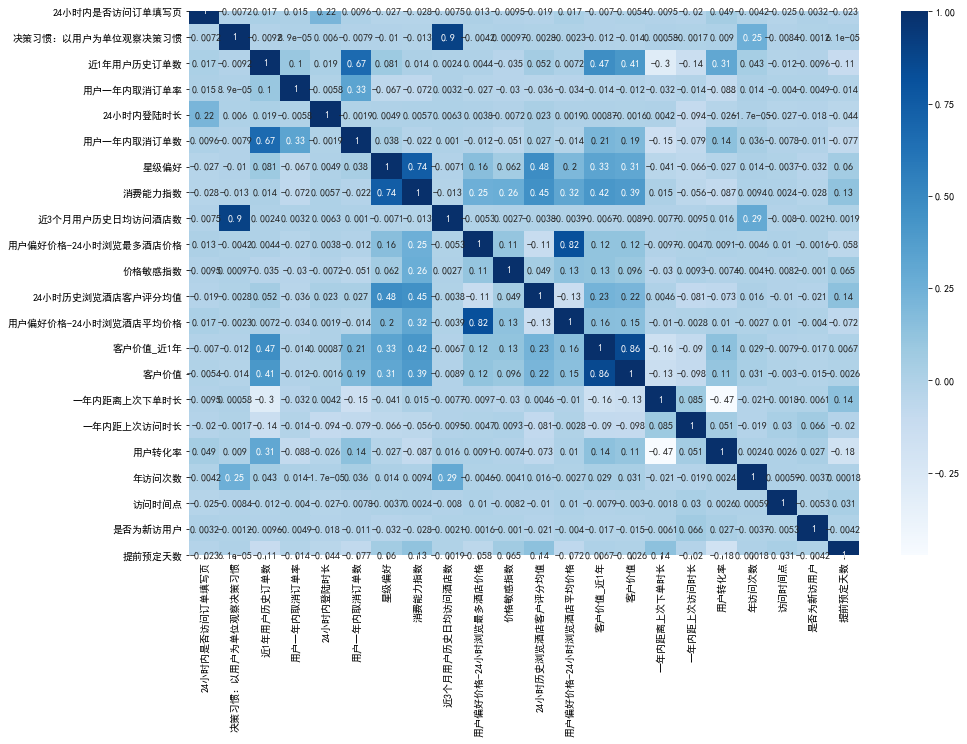

In [69]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_customerbehavior.dropna().corr(),cmap='Blues',annot=True)

#### 酒店行为字段

In [70]:
df_hotelbehavior.columns

Index(['24小时内已访问次数最多酒店历史取消率', '24小时内已访问次数最多酒店可订最低价', '24小时内已访问酒店价格与对手价差均值，t+1',
       '24小时内已访问酒店可订最低价均值', '24小时内已访问酒店商务属性指数均值', '24小时历史浏览次数最多酒店历史cr',
       '24小时历史浏览次数最多酒店历史uv', '24小时历史浏览次数最多酒店商务属性指数', '24小时历史浏览次数最多酒店点评数',
       '24小时历史浏览次数最多酒店评分人数', '24小时历史浏览酒店历史uv均值', '24小时历史浏览酒店点评数均值',
       '24小时历史浏览酒店评分人数均值', '平均价格', '当前酒店历史cr', '当前酒店历史uv', '当前酒店历史取消率',
       '当前酒店可定最低价', '当前酒店点评数', '当前酒店评分人数', '昨日访问当前城市同入住日期的app uv数', '首单bu'],
      dtype='object')

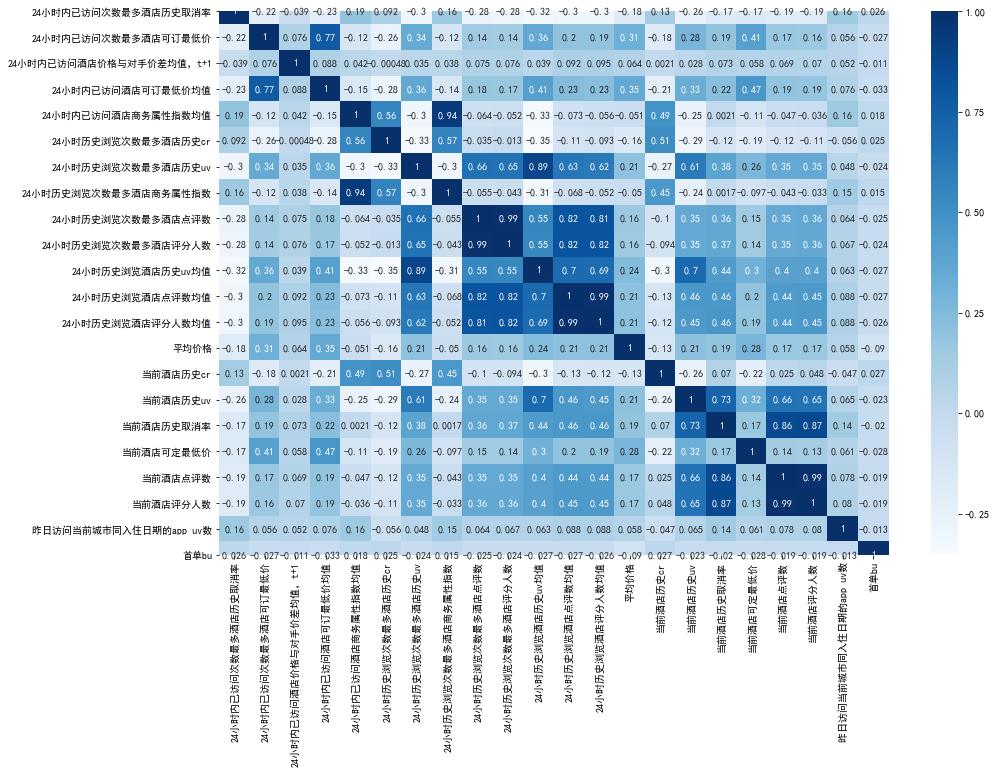

In [71]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_hotelbehavior.dropna().corr(),cmap='Blues',annot=True)

### 划分测试训练集

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(df_0,target,test_size=0.3,random_state=100)

### 异常值负数的处理

In [73]:
neg = []
for i in xtrain.columns:
    if (xtrain[i]<0).sum()>0:
        neg.append(i)

In [74]:
neg

['用户偏好价格-24小时浏览最多酒店价格',
 '用户偏好价格-24小时浏览酒店平均价格',
 '客户价值_近1年',
 '客户价值',
 '24小时内已访问酒店价格与对手价差均值，t+1']

In [75]:
# 利用中位数对以上字段中的价格指标负值进行替换
# 利用固定值0对以上字段中的客户价值指标负值进行替换

In [76]:
neg_median = ['用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格','24小时内已访问酒店价格与对手价差均值，t+1']
neg_zero = ['客户价值_近1年','客户价值']

In [77]:
for i in neg_median:
    xtrain.loc[xtrain[i]<0,i] = xtrain[i].median()

for i in neg_median:
    xtest.loc[xtest[i]<0,i] = xtrain[i].median()

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [78]:
for i in neg_zero:
    xtrain.loc[xtrain[i]<0,i] = 0

for i in neg_zero:
    xtest.loc[xtest[i]<0,i] = 0

In [157]:
(xtrain<0).sum()

24小时内是否访问订单填写页             389633
近1年用户历史订单数                 357484
当前酒店历史cr                   290044
用户一年内取消订单率                 317757
24小时内登陆时长                  376902
用户一年内取消订单数                 395668
当前酒店点评数                    338276
星级偏好                       211743
当前酒店评分人数                   333189
消费能力指数                     272880
当前酒店历史取消率                  328353
价格敏感指数                     323736
当前酒店历史uv                   344256
24小时历史浏览次数最多酒店历史cr         270713
平均价格                       348356
当前酒店可定最低价                  324961
首单bu                       239972
24小时历史浏览酒店客户评分均值           238980
24小时内已访问次数最多酒店历史取消率        286266
24小时历史浏览酒店评分人数均值           318912
24小时历史浏览次数最多酒店评分人数         335127
24小时内已访问酒店价格与对手价差均值，t+1    281195
24小时内已访问次数最多酒店可订最低价        327588
24小时内已访问酒店可订最低价均值          318277
一年内距离上次下单时长                350033
昨日访问当前城市同入住日期的app uv数      336808
一年内距上次访问时长                 374022
用户转化率                      162193
年访问次数                      413329
访问时间点         

### 分类填充缺失值

#### 固定值填充

In [79]:
for col in df_customerbehavior.columns:
    xtrain[col]=xtrain[col].fillna(0)#用户行为缺失值填0
xtrain.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,星级偏好,当前酒店评分人数,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,一年内距上次访问时长,用户转化率,年访问次数,访问时间点,是否为新访用户,提前预定天数
295636,0,13.0,1.0,1.07,0.00,0.0,0.0,1494.0,80.0,2258.0,...,410.0,42616.0,0.41,11.927,9258.0,1.20,981.0,8,0,0.0
129861,0,0.0,0.0,1.10,0.00,6.0,0.0,797.0,0.0,1230.0,...,118.0,0.0,0.64,17.220,1606.0,0.00,562.0,1,0,0.0
240919,0,0.0,3.0,1.08,0.00,0.0,0.0,550.0,40.0,1431.0,...,400.0,83890.0,0.55,14.487,2233.0,1.29,2149.0,21,0,0.0
578240,0,0.0,0.0,1.03,0.00,8.0,0.0,1.0,0.0,71.0,...,150.0,0.0,0.19,1.407,0.0,0.00,0.0,21,0,6.0
210779,0,4.0,6.0,1.02,0.99,0.0,578.0,96.0,55.0,145.0,...,257.0,5956.0,0.02,1.440,138.0,1.13,5672.0,16,0,0.0


In [80]:
for col in df_customerbehavior.columns:
    xtest[col]=xtest[col].fillna(0)#用户行为缺失值填0
xtest.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,24小时内是否访问订单填写页,决策习惯：以用户为单位观察决策习惯,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,星级偏好,当前酒店评分人数,...,24小时内已访问酒店可订最低价均值,一年内距离上次下单时长,24小时内已访问酒店商务属性指数均值,昨日访问当前城市同入住日期的app uv数,一年内距上次访问时长,用户转化率,年访问次数,访问时间点,是否为新访用户,提前预定天数
508124,0,2.0,63.0,1.03,0.10,0.0,211.0,1265.0,96.8,1638.0,...,1682.0,14954.0,0.39,8.367,14543.0,1.33,2888.0,13,0,1.0
395004,0,2.0,10.0,1.05,0.33,0.0,99.0,2575.0,67.5,4161.0,...,1072.0,3092.0,0.18,7.640,10.0,1.03,17864.0,11,0,1.0
92847,0,1.0,2.0,1.08,0.06,0.0,1.0,437.0,60.0,775.0,...,183.0,23291.0,NaN,21.680,263.0,1.33,202.0,13,0,1.0
482783,1,6.0,3.0,1.05,0.33,0.0,1.0,1321.0,60.0,1678.0,...,181.0,179994.0,0.39,2.853,5001.0,1.00,2637.0,22,0,2.0
217237,0,1.0,49.0,1.04,0.38,0.0,717.0,NaN,65.7,1.0,...,108.0,51054.0,NaN,2.000,383.0,1.55,5571.0,15,0,0.0


In [81]:
xtrain['首单bu']=xtrain['首单bu'].fillna(0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
xtest['首单bu']=xtest['首单bu'].fillna(0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([5.2254e+04, 4.0148e+04, 2.4654e+04, 2.2723e+04, 2.1647e+04,
        2.6623e+04, 2.4920e+04, 2.9891e+04, 3.1457e+04, 3.6278e+04,
        3.6171e+04, 3.6957e+04, 3.4007e+04, 2.8257e+04, 2.0484e+04,
        1.1622e+04, 4.2220e+03, 1.3590e+03, 2.1500e+02, 7.0000e+00]),
 array([0.    , 0.0495, 0.099 , 0.1485, 0.198 , 0.2475, 0.297 , 0.3465,
        0.396 , 0.4455, 0.495 , 0.5445, 0.594 , 0.6435, 0.693 , 0.7425,
        0.792 , 0.8415, 0.891 , 0.9405, 0.99  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览次数最多酒店商务属性指数')

(array([1.60000e+01, 1.00000e+01, 1.40000e+01, 4.00000e+00, 1.40000e+01,
        1.00000e+02, 4.10000e+02, 1.83540e+04, 5.22636e+05, 1.22800e+03,
        2.19000e+02, 9.00000e+01, 3.40000e+01, 4.00000e+01, 4.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-2296., -2015., -1734., -1453., -1172.,  -891.,  -610.,  -329.,
          -48.,   233.,   514.,   795.,  1076.,  1357.,  1638.,  1919.,
         2200.,  2481.,  2762.,  3043.,  3324.]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时内已访问酒店价格与对手价差均值，t+1')

(array([5.8107e+04, 5.2715e+04, 2.8437e+04, 2.6669e+04, 2.7840e+04,
        3.2079e+04, 3.4477e+04, 3.9830e+04, 4.6255e+04, 5.0605e+04,
        5.1877e+04, 5.0675e+04, 4.2864e+04, 2.9983e+04, 1.8040e+04,
        8.7170e+03, 2.8910e+03, 7.8600e+02, 1.0600e+02, 7.0000e+00]),
 array([0.    , 0.0495, 0.099 , 0.1485, 0.198 , 0.2475, 0.297 , 0.3465,
        0.396 , 0.4455, 0.495 , 0.5445, 0.594 , 0.6435, 0.693 , 0.7425,
        0.792 , 0.8415, 0.891 , 0.9405, 0.99  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时内已访问酒店商务属性指数均值')

(array([4.70406e+05, 9.22040e+04, 3.32380e+04, 1.39390e+04, 5.45300e+03,
        2.69100e+03, 9.70000e+02, 7.00000e+02, 1.14500e+03, 2.99000e+02,
        0.00000e+00, 0.00000e+00, 4.37000e+02, 1.01000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.46000e+02]),
 array([    0.  ,  1709.45,  3418.9 ,  5128.35,  6837.8 ,  8547.25,
        10256.7 , 11966.15, 13675.6 , 15385.05, 17094.5 , 18803.95,
        20513.4 , 22222.85, 23932.3 , 25641.75, 27351.2 , 29060.65,
        30770.1 , 32479.55, 34189.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店点评数')

(array([  5580.,  17357.,  49339.,  48269.,  73448., 108188.,  85573.,
         61605.,  63904.,  42843.,  28719.,  19440.,   8184.,  10273.,
          4204.,   5039.,   4521.,   2722.,   2513.,  11294.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时内已访问次数最多酒店历史取消率')

(array([4.81480e+05, 1.19717e+05, 3.68090e+04, 1.11230e+04, 3.74500e+03,
        1.70700e+03, 9.23000e+02, 5.34000e+02, 4.12000e+02, 5.22000e+02,
        1.34000e+02, 7.10000e+01, 3.70000e+01, 1.78000e+02, 7.80000e+01,
        1.90000e+01, 9.00000e+00, 4.00000e+00, 2.00000e+00, 1.12000e+02]),
 array([1.000000e+00, 2.272750e+03, 4.544500e+03, 6.816250e+03,
        9.088000e+03, 1.135975e+04, 1.363150e+04, 1.590325e+04,
        1.817500e+04, 2.044675e+04, 2.271850e+04, 2.499025e+04,
        2.726200e+04, 2.953375e+04, 3.180550e+04, 3.407725e+04,
        3.634900e+04, 3.862075e+04, 4.089250e+04, 4.316425e+04,
        4.543600e+04]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览酒店评分人数均值')

(array([6.59239e+05, 3.84000e+02, 3.50000e+01, 1.00000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.50000e+01, 4.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.000000e+00, 5.000950e+03, 1.000090e+04, 1.500085e+04,
        2.000080e+04, 2.500075e+04, 3.000070e+04, 3.500065e+04,
        4.000060e+04, 4.500055e+04, 5.000050e+04, 5.500045e+04,
        6.000040e+04, 6.500035e+04, 7.000030e+04, 7.500025e+04,
        8.000020e+04, 8.500015e+04, 9.000010e+04, 9.500005e+04,
        1.000000e+05]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时内已访问次数最多酒店可订最低价')

(array([5.22905e+05, 1.31318e+05, 5.84100e+03, 2.83000e+02, 8.70000e+01,
        5.50000e+01, 1.20000e+01, 3.30000e+01, 4.00000e+00, 4.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([1.    , 1.0975, 1.195 , 1.2925, 1.39  , 1.4875, 1.585 , 1.6825,
        1.78  , 1.8775, 1.975 , 2.0725, 2.17  , 2.2675, 2.365 , 2.4625,
        2.56  , 2.6575, 2.755 , 2.8525, 2.95  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '24小时历史浏览次数最多酒店历史cr')

(array([5.09578e+05, 9.57690e+04, 3.73350e+04, 1.60590e+04, 6.81700e+03,
        2.50400e+03, 1.68200e+03, 7.46000e+02, 4.91000e+02, 9.53000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 4.37000e+02, 1.01000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.46000e+02]),
 array([1.00000e+00, 2.27370e+03, 4.54640e+03, 6.81910e+03, 9.09180e+03,
        1.13645e+04, 1.36372e+04, 1.59099e+04, 1.81826e+04, 2.04553e+04,
        2.27280e+04, 2.50007e+04, 2.72734e+04, 2.95461e+04, 3.18188e+04,
        3.40915e+04, 3.63642e+04, 3.86369e+04, 4.09096e+04, 4.31823e+04,
        4.54550e+04]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店评分人数')

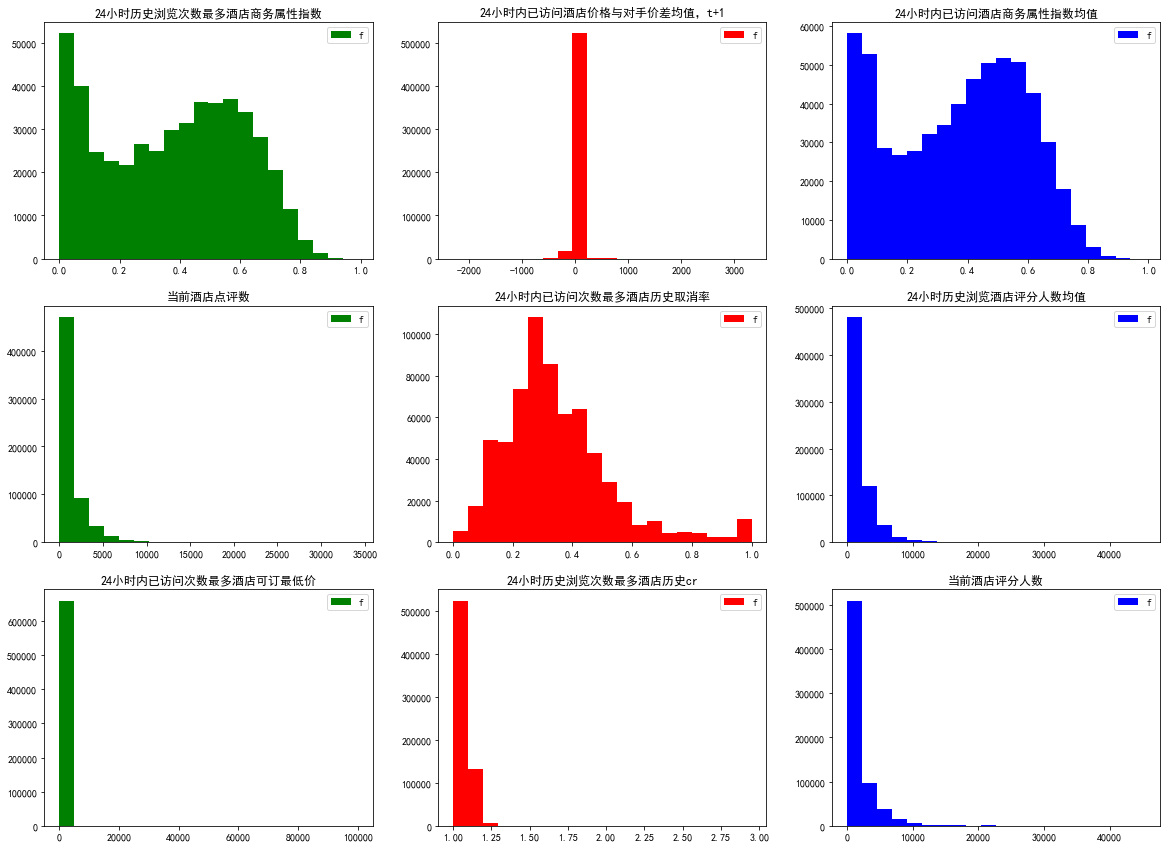

In [83]:
fig = plt.figure(figsize=(20,20))

plt.subplot(431)
plt.hist(df_0['24小时历史浏览次数最多酒店商务属性指数'].dropna(),bins=20,color='g')
plt.title('24小时历史浏览次数最多酒店商务属性指数')
plt.legend('freqency')

plt.subplot(432)
plt.hist(df_0['24小时内已访问酒店价格与对手价差均值，t+1'].dropna(),bins=20,color='r')
plt.title('24小时内已访问酒店价格与对手价差均值，t+1')
plt.legend('freqency')

plt.subplot(433)
plt.hist(df_0['24小时内已访问酒店商务属性指数均值'].dropna(),bins=20,color='b')
plt.title('24小时内已访问酒店商务属性指数均值')
plt.legend('freqency')

plt.subplot(434)
plt.hist(df_0['当前酒店点评数'].dropna(),bins=20,color='g')
plt.title('当前酒店点评数')
plt.legend('freqency')

plt.subplot(435)
plt.hist(df_0['24小时内已访问次数最多酒店历史取消率'].dropna(),bins=20,color='r')
plt.title('24小时内已访问次数最多酒店历史取消率')
plt.legend('freqency')

plt.subplot(436)
plt.hist(df_0['24小时历史浏览酒店评分人数均值'].dropna(),bins=20,color='b')
plt.title('24小时历史浏览酒店评分人数均值')
plt.legend('freqency')

plt.subplot(437)
plt.hist(df_0['24小时内已访问次数最多酒店可订最低价'].dropna(),bins=20,color='g')
plt.title('24小时内已访问次数最多酒店可订最低价')
plt.legend('freqency')

plt.subplot(438)
plt.hist(df_0['24小时历史浏览次数最多酒店历史cr'].dropna(),bins=20,color='r')
plt.title('24小时历史浏览次数最多酒店历史cr')
plt.legend('freqency')

plt.subplot(439)
plt.hist(df_0['当前酒店评分人数'].dropna(),bins=20,color='b')
plt.title('当前酒店评分人数')
plt.legend('freqency')

(array([4.46616e+05, 1.13643e+05, 5.20570e+04, 2.81830e+04, 1.69910e+04,
        8.97000e+03, 6.33700e+03, 8.79000e+02, 1.36700e+03, 1.19200e+03,
        2.10000e+02, 1.44000e+02, 3.13000e+02, 4.62000e+02, 0.00000e+00,
        3.16000e+02, 0.00000e+00, 0.00000e+00, 1.01000e+02, 4.46000e+02]),
 array([1.000000e+00, 9.474500e+02, 1.893900e+03, 2.840350e+03,
        3.786800e+03, 4.733250e+03, 5.679700e+03, 6.626150e+03,
        7.572600e+03, 8.519050e+03, 9.465500e+03, 1.041195e+04,
        1.135840e+04, 1.230485e+04, 1.325130e+04, 1.419775e+04,
        1.514420e+04, 1.609065e+04, 1.703710e+04, 1.798355e+04,
        1.893000e+04]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店历史取消率')

(array([6.87374e+05, 4.39000e+02, 7.60000e+01, 1.30000e+01, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 1.40000e+01, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e+00]),
 array([-3.000000e+00,  4.997150e+03,  9.997300e+03,  1.499745e+04,
         1.999760e+04,  2.499775e+04,  2.999790e+04,  3.499805e+04,
         3.999820e+04,  4.499835e+04,  4.999850e+04,  5.499865e+04,
         5.999880e+04,  6.499895e+04,  6.999910e+04,  7.499925e+04,
         7.999940e+04,  8.499955e+04,  8.999970e+04,  9.499985e+04,
         1.000000e+05]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, '当前酒店可定最低价')

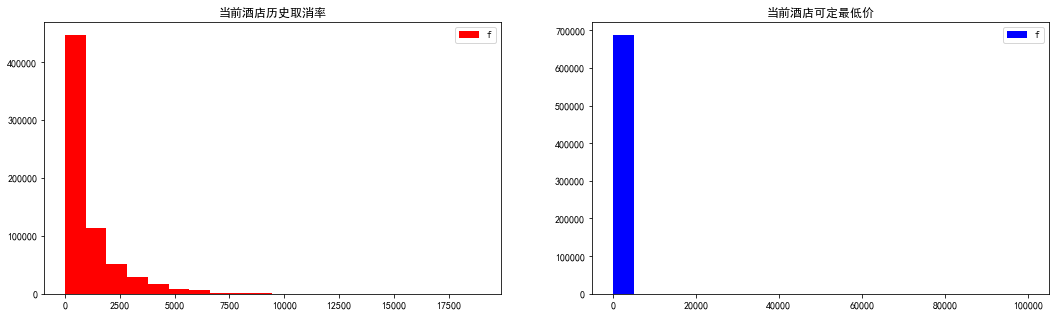

In [84]:
fig = plt.figure(figsize=(18,5))

plt.subplot(121)
plt.hist(df_0['当前酒店历史取消率'].dropna(),bins=20,color='r')
plt.title('当前酒店历史取消率')
plt.legend('freqency')

plt.subplot(122)
plt.hist(df_0['当前酒店可定最低价'].dropna(),bins=20,color='b')
plt.title('当前酒店可定最低价')
plt.legend('freqency')

### 训练集缺失值填充

#### 训练集中位数填充

In [85]:
xtrain.isnull().sum()

24小时内是否访问订单填写页                  0
决策习惯：以用户为单位观察决策习惯               0
近1年用户历史订单数                      0
当前酒店历史cr                      589
用户一年内取消订单率                      0
24小时内登陆时长                       0
用户一年内取消订单数                      0
当前酒店点评数                     47617
星级偏好                            0
当前酒店评分人数                    12018
消费能力指数                          0
近3个月用户历史日均访问酒店数                 0
当前酒店历史取消率                    8292
用户偏好价格-24小时浏览最多酒店价格             0
价格敏感指数                          0
当前酒店历史uv                      589
24小时历史浏览次数最多酒店商务属性指数       144425
24小时历史浏览次数最多酒店历史cr          20637
平均价格                       162599
当前酒店可定最低价                    1438
首单bu                            0
24小时历史浏览酒店客户评分均值                0
用户偏好价格-24小时浏览酒店平均价格             0
24小时历史浏览次数最多酒店点评数           64170
客户价值_近1年                        0
24小时历史浏览酒店点评数均值             29162
24小时内已访问次数最多酒店历史取消率         25941
24小时历史浏览酒店评分人数均值            22713
24小时历史浏览次数最多酒店评分人数          28792
客户价值          

In [86]:
median_fill =['24小时历史浏览次数最多酒店点评数','24小时历史浏览次数最多酒店评分人数','24小时历史浏览次数最多酒店历史uv',
              '24小时历史浏览酒店点评数均值','24小时内已访问酒店可订最低价均值',
              '昨日访问当前城市同入住日期的app uv数','当前酒店历史cr','当前酒店历史uv','平均价格','24小时历史浏览酒店历史uv均值',
              '当前酒店点评数','24小时内已访问次数最多酒店历史取消率','24小时历史浏览酒店评分人数均值',
              '24小时内已访问次数最多酒店可订最低价','当前酒店评分人数','当前酒店历史取消率','当前酒店可定最低价']
for i in median_fill:
    xtrain[i] = xtrain[i].fillna(xtrain[i].median())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### 训练集均值填充

In [87]:
mean_fill = ['24小时历史浏览次数最多酒店历史cr','24小时内已访问酒店价格与对手价差均值，t+1','24小时历史浏览次数最多酒店商务属性指数','24小时内已访问酒店商务属性指数均值']
for i in mean_fill:
    xtrain[i]=xtrain[i].fillna(xtrain[i].mean())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


####  检验缺失值填充情况


In [88]:
pd.DataFrame(xtrain.isnull().sum())

,0
24小时内是否访问订单填写页,0
决策习惯：以用户为单位观察决策习惯,0
近1年用户历史订单数,0
当前酒店历史cr,0
用户一年内取消订单率,0
24小时内登陆时长,0
用户一年内取消订单数,0
当前酒店点评数,0
星级偏好,0
当前酒店评分人数,0


### 测试集缺失值填充

In [89]:
xtest.isnull().sum()

24小时内是否访问订单填写页                 0
决策习惯：以用户为单位观察决策习惯              0
近1年用户历史订单数                     0
当前酒店历史cr                     208
用户一年内取消订单率                     0
24小时内登陆时长                      0
用户一年内取消订单数                     0
当前酒店点评数                    20299
星级偏好                           0
当前酒店评分人数                    5009
消费能力指数                         0
近3个月用户历史日均访问酒店数                0
当前酒店历史取消率                   3426
用户偏好价格-24小时浏览最多酒店价格            0
价格敏感指数                         0
当前酒店历史uv                     208
24小时历史浏览次数最多酒店商务属性指数       61624
24小时历史浏览次数最多酒店历史cr          8760
平均价格                       70085
当前酒店可定最低价                    576
首单bu                           0
24小时历史浏览酒店客户评分均值               0
用户偏好价格-24小时浏览酒店平均价格            0
24小时历史浏览次数最多酒店点评数          27407
客户价值_近1年                       0
24小时历史浏览酒店点评数均值            12326
24小时内已访问次数最多酒店历史取消率        10989
24小时历史浏览酒店评分人数均值            9616
24小时历史浏览次数最多酒店评分人数         12197
客户价值                           0
24小时内已访问酒店

In [90]:
for i in median_fill:
    xtest[i] = xtest[i].fillna(xtrain[i].median())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
for i in mean_fill:
    xtest[i]=xtest[i].fillna(xtrain[i].mean())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
pd.DataFrame(xtest.isnull().sum())

,0
24小时内是否访问订单填写页,0
决策习惯：以用户为单位观察决策习惯,0
近1年用户历史订单数,0
当前酒店历史cr,0
用户一年内取消订单率,0
24小时内登陆时长,0
用户一年内取消订单数,0
当前酒店点评数,0
星级偏好,0
当前酒店评分人数,0


### 极值处理

#### 先处理训练集

In [93]:
max_value_before = []
for col in xtrain.columns:
    mv = xtrain[col].max()
    max_value_before.append(mv)

print(max_value_before)

[1, 3167.0, 711.0, 3.18, 1.0, 49.0, 13475.0, 34189.0, 100.0, 45455.0, 100.0, 3167.0, 18930.0, 5398.0, 100.0, 1722.6129999999998, 0.99, 2.95, 6383.0, 100000.0, 21.0, 6.0, 5042.0, 34189.0, 598.064, 34189.0, 1.0, 45436.0, 45436.0, 600.82, 3324.0, 100000.0, 1722.6129999999998, 1722.6129999999998, 43700.0, 527026.0, 0.99, 67.14, 194386.0, 11.0, 9651192.0, 23, 1, 30.0]


In [94]:
for col in xtrain.columns:    
    
    percent1=np.percentile(xtrain[col],1)       # 该列的1%分位数
    percent99=np.percentile(xtrain[col],99)       # 该列的99%分位数

    xtrain.loc[xtrain[col]<percent1,col]=percent1    # 小于1%分位数的，用1%分位数填充
    xtrain.loc[xtrain[col]>percent99,col]=percent99    # 大于99%分位数的，用99%分位数填充00

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
max_value_after = []
for col in xtrain.columns:
    mv = xtrain[col].max()
    max_value_after.append(mv)

print(max_value_after)

[1.0, 22.0, 67.0, 1.19, 1.0, 48.0, 1497.0, 8232.0, 100.0, 11549.0, 100.0, 24.0, 6337.0, 920.0, 100.0, 964.113, 0.79, 1.19, 1359.0, 1820.0, 15.0, 5.5, 869.0, 9443.0, 23.272, 7234.400000000023, 1.0, 9797.800000000047, 13365.0, 33.029000000000934, 97.0, 1684.4000000000233, 994.8599999999999, 846.953, 1439.0, 465804.0, 0.77, 66.007, 134469.0, 2.0, 180874.0, 23.0, 1.0, 27.0]


#### 再用训练集的分位数处理测试集

In [96]:
for col in xtest.columns:
    
    percent1=np.percentile(xtrain[col],1)       # 该列的1%分位数
    percent99=np.percentile(xtrain[col],99)       # 该列的99%分位数
    
    xtest.loc[xtest[col]<percent1,col]=percent1    # 小于1%分位数的，用1%分位数填充
    xtest.loc[xtest[col]>percent99,col]=percent99    # 大于99%分位数的，用99%分位数填充00

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### PCA降维

#### 训练集降维

In [97]:
pca_1 = PCA(n_components=1,random_state=66)
pca_2 = PCA(n_components=1,random_state=66)
pca_3 = PCA(n_components=1,random_state=66)
pca_4 = PCA(n_components=1,random_state=66)
pca_5 = PCA(n_components=1,random_state=66)
pca_6 = PCA(n_components=1,random_state=66)

y1 = np.array(xtrain[['决策习惯：以用户为单位观察决策习惯','近3个月用户历史日均访问酒店数']])
y2 = np.array(xtrain[['用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格']])
y3 = np.array(xtrain[['客户价值_近1年','客户价值']])
y4 = np.array(xtrain[['24小时内已访问酒店商务属性指数均值','24小时历史浏览次数最多酒店商务属性指数']])
y5 = np.array(xtrain[['24小时历史浏览次数最多酒店历史uv','24小时历史浏览酒店历史uv均值']])
y6 = np.array(xtrain[['24小时历史浏览次数最多酒店点评数','24小时历史浏览酒店点评数均值']])

决策行为 = pca_1.fit_transform(y1)
用户偏好价格 = pca_2.fit_transform(y2)
客户价值 = pca_3.fit_transform(y3)
浏览酒店商务属性 = pca_4.fit_transform(y4)
浏览酒店历史uv = pca_5.fit_transform(y5)
访问过的酒店点评数 = pca_6.fit_transform(y6)

xtrain.drop(axis=1,labels=['决策习惯：以用户为单位观察决策习惯','近3个月用户历史日均访问酒店数',
                         '用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格',
                         '客户价值_近1年','客户价值',
                         '24小时内已访问酒店商务属性指数均值','24小时历史浏览次数最多酒店商务属性指数',
                         '24小时历史浏览次数最多酒店历史uv','24小时历史浏览酒店历史uv均值',
                         '24小时历史浏览次数最多酒店点评数','24小时历史浏览酒店点评数均值'],inplace=True)

xtrain['决策行为'] = 决策行为
xtrain['用户偏好价格'] = 用户偏好价格
xtrain['客户价值'] = 客户价值
xtrain['浏览酒店商务属性'] = 浏览酒店商务属性
xtrain['浏览酒店历史uv'] = 浏览酒店历史uv
xtrain['访问过的酒店点评数'] = 访问过的酒店点评数

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anac

#### 测试集降维

In [98]:
pca_1_test = PCA(n_components=1,random_state=66)
pca_2_test = PCA(n_components=1,random_state=66)
pca_3_test = PCA(n_components=1,random_state=66)
pca_4_test = PCA(n_components=1,random_state=66)
pca_5_test = PCA(n_components=1,random_state=66)
pca_6_test = PCA(n_components=1,random_state=66)

y1_test = np.array(xtest[['决策习惯：以用户为单位观察决策习惯','近3个月用户历史日均访问酒店数']])
y2_test = np.array(xtest[['用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格']])
y3_test = np.array(xtest[['客户价值_近1年','客户价值']])
y4_test = np.array(xtest[['24小时内已访问酒店商务属性指数均值','24小时历史浏览次数最多酒店商务属性指数']])
y5_test = np.array(xtest[['24小时历史浏览次数最多酒店历史uv','24小时历史浏览酒店历史uv均值']])
y6_test = np.array(xtest[['24小时历史浏览次数最多酒店点评数','24小时历史浏览酒店点评数均值']])

决策行为_test = pca_1.fit_transform(y1_test)
用户偏好价格_test = pca_2.fit_transform(y2_test)
客户价值_test = pca_3.fit_transform(y3_test)
浏览酒店商务属性_test = pca_4.fit_transform(y4_test)
浏览酒店历史uv_test = pca_5.fit_transform(y5_test)
访问过的酒店点评数_test = pca_6.fit_transform(y6_test)

xtest.drop(axis=1,labels=['决策习惯：以用户为单位观察决策习惯','近3个月用户历史日均访问酒店数',
                         '用户偏好价格-24小时浏览最多酒店价格','用户偏好价格-24小时浏览酒店平均价格',
                         '客户价值_近1年','客户价值',
                         '24小时内已访问酒店商务属性指数均值','24小时历史浏览次数最多酒店商务属性指数',
                         '24小时历史浏览次数最多酒店历史uv','24小时历史浏览酒店历史uv均值',
                         '24小时历史浏览次数最多酒店点评数','24小时历史浏览酒店点评数均值'],inplace=True)

xtest['决策行为'] = 决策行为_test
xtest['用户偏好价格'] = 用户偏好价格_test
xtest['客户价值'] = 客户价值_test
xtest['浏览酒店商务属性'] = 浏览酒店商务属性_test
xtest['浏览酒店历史uv'] = 浏览酒店历史uv_test
xtest['访问过的酒店点评数'] = 访问过的酒店点评数_test

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anac

In [99]:
xtrain.shape
xtest.shape

(482961, 38)

(206984, 38)

### 对自变量进行标准化

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std = StandardScaler()

In [101]:
train_columns = list(xtrain.columns)
test_columns = list(xtest.columns)

std = std.fit(xtrain)
xtrain = pd.DataFrame(std.transform(xtrain))
xtrain.columns = train_columns

xtest = pd.DataFrame(std.transform(xtest))
xtest.columns = test_columns

In [102]:
xtrain.head()

,24小时内是否访问订单填写页,近1年用户历史订单数,当前酒店历史cr,用户一年内取消订单率,24小时内登陆时长,用户一年内取消订单数,当前酒店点评数,星级偏好,当前酒店评分人数,消费能力指数,...,年访问次数,访问时间点,是否为新访用户,提前预定天数,决策行为,用户偏好价格,客户价值,浏览酒店商务属性,浏览酒店历史uv,访问过的酒店点评数
0,-0.489416,-0.445079,0.223440,-0.676082,-0.478012,-0.365541,0.222111,0.974601,0.291417,0.137701,...,-0.176645,-1.027127,-0.243046,-0.554408,2.481348,-0.197537,-0.413627,-0.247695,0.675182,1.883974
1,-0.489416,-0.529560,0.931551,-0.676082,0.013968,-0.365541,-0.217675,-1.288453,-0.169292,-0.995371,...,-0.197833,-2.138667,-0.243046,-0.554408,-0.669634,-0.666925,-0.478192,0.733410,-0.511850,-0.541693
2,-0.489416,-0.276118,0.459477,-0.676082,-0.478012,-0.365541,-0.373524,-0.156926,-0.079212,-0.126682,...,-0.117581,1.037163,-0.243046,-0.554408,-0.669634,-0.197537,-0.361723,1.089865,0.350807,0.615365
3,-0.489416,-0.529560,-0.720708,-0.676082,0.177961,-0.365541,-0.719927,-1.288453,-0.688711,-0.995371,...,-0.226253,1.037163,-0.243046,0.345178,-0.669634,-0.666925,-0.478192,-0.479517,-0.461276,-0.782747
4,-0.489416,-0.022677,-0.956745,2.333703,-0.478012,1.932636,-0.659985,0.267396,-0.655547,-0.391066,...,0.060571,0.243206,-0.243046,-0.554408,1.031805,-0.300304,-0.376250,-1.829538,-0.440185,-0.332768


### 用决策树模型获得最优字段排序

In [103]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=100,class_weight="balanced")
clf = clf.fit(xtrain,ytrain)

In [104]:
clf.feature_importances_

array([0.01493671, 0.02130015, 0.01305549, 0.01740599, 0.02031515,
       0.0184049 , 0.00999001, 0.0255706 , 0.00966005, 0.02049258,
       0.01092953, 0.02674312, 0.01245086, 0.02052331, 0.02663746,
       0.01570462, 0.01141221, 0.02346052, 0.02800852, 0.02283696,
       0.02501154, 0.01757332, 0.02642096, 0.02916613, 0.03592722,
       0.05505723, 0.04876805, 0.05734553, 0.06289723, 0.04863801,
       0.00461742, 0.04702628, 0.03106594, 0.02006406, 0.03553539,
       0.03841914, 0.0257458 , 0.02088205])

In [105]:
feature_result = pd.DataFrame({'feature':list(xtrain.columns),
                              'importance':clf.feature_importances_}) 

feature_result = feature_result.sort_values('importance',ascending=False).reset_index(drop=True)

feature_result

,feature,importance
0,年访问次数,0.062897
1,用户转化率,0.057346
2,昨日访问当前城市同入住日期的app uv数,0.055057
3,一年内距上次访问时长,0.048768
4,访问时间点,0.048638
5,提前预定天数,0.047026
6,浏览酒店商务属性,0.038419
7,一年内距离上次下单时长,0.035927
8,客户价值,0.035535
9,决策行为,0.031066


In [106]:
ytreepred = clf.predict(xtest)

In [107]:
print(classification_report(ytest,ytreepred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    150496
           1       0.72      0.73      0.73     56488

    accuracy                           0.85    206984
   macro avg       0.81      0.81      0.81    206984
weighted avg       0.85      0.85      0.85    206984



In [108]:
clf.score(xtest,ytest)

0.8509884822015228

In [109]:
# 取前20个，有待商榷

In [110]:
ind = list(feature_result['feature'][:30])
xtrain_reduced = xtrain[ind]
xtest_reduced = xtest[ind]

##### 字段重要性差距较小，试过后证明，摒弃部分排名靠后的字段后，模型效果会变差
##### 因此选择保留所有字段

## 建模与评估

### XGBoost

In [111]:
import xgboost as xgb

In [112]:
# 数据类型转换
dtrain = xgb.DMatrix(xtrain,ytrain)
dtest = xgb.DMatrix(xtest)

# 设置参数
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth':8,
        'gamma':0,
        'lambda':2,
        'subsample':0.7,
        'colsample_bytree':0.8,
        'min_child_weight':3,
        'eta': 0.2,
        'nthread':8, 
        'silent':1} 

# 观测每次迭代的模型的评估分数
watchlist = [(dtrain,'train')]

# 训练模型
bst = xgb.train(params,dtrain,num_boost_round=500,evals=watchlist)
ypred = bst.predict(dtest)  # 预测分数

# 设置阈值，输出标签取值
y_pred = (ypred>=0.5)*1

from sklearn import metrics
print('AUC: %.4f'% metrics.roc_auc_score(ytest,ypred))  # 预测分数
print('ACC: %.4f'% metrics.accuracy_score(ytest,y_pred))  # 使用预测标签
print('Recall: %.4f'% metrics.recall_score(ytest,y_pred))
print('F1-score: %.4f'% metrics.f1_score(ytest,y_pred))
print('precision: %.4f'% metrics.precision_score(ytest,y_pred))
metrics.confusion_matrix(ytest,y_pred)

C:\Users\Zhichen\AppData\Roaming\Python\Python37\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.72097
[1]	train-auc:0.736307
[2]	train-auc:0.74455
[3]	train-auc:0.750368
[4]	train-auc:0.754964
[5]	train-auc:0.758635
[6]	train-auc:0.762028
[7]	train-auc:0.765258
[8]	train-auc:0.76913
[9]	train-auc:0.771173
[10]	train-auc:0.773348
[11]	train-auc:0.777012
[12]	train-auc:0.779322
[13]	train-auc:0.780826
[14]	train-auc:0.783572
[15]	train-auc:0.785678
[16]	train-auc:0.787637
[17]	train-auc:0.789503
[18]	train-auc:0.790826
[19]	train-auc:0.79221
[20]	train-auc:0.793969
[21]	train-auc:0.795208
[22]	train-auc:0.796671
[23]	train-auc:0.798776
[24]	train-auc:0.799854
[25]	train-auc:0.802549
[26]	train-auc:0.80413
[27]	train-auc:0.806365
[28]	train-auc:0.807084
[29]	train-auc:0.808864
[30]	train-auc:0.809775
[31]	train-auc:0.810786
[32]	train-auc:0.812148
[33]	train-auc:0.814497
[34]	train-auc:0.816238
[35]	train-auc:0.817192
[36]	train-auc:0.81811
[37]	train-auc:0.819784
[38]	train-auc:0.821439
[39]	train-auc:0.822667
[40]	train-auc:0.824
[41]	train-auc:0.824853
[42]	train-

[334]	train-auc:0.963369
[335]	train-auc:0.963483
[336]	train-auc:0.963712
[337]	train-auc:0.963798
[338]	train-auc:0.963956
[339]	train-auc:0.964044
[340]	train-auc:0.964353
[341]	train-auc:0.964412
[342]	train-auc:0.964543
[343]	train-auc:0.964723
[344]	train-auc:0.964868
[345]	train-auc:0.964998
[346]	train-auc:0.965256
[347]	train-auc:0.96538
[348]	train-auc:0.965516
[349]	train-auc:0.965644
[350]	train-auc:0.965917
[351]	train-auc:0.966086
[352]	train-auc:0.96625
[353]	train-auc:0.966415
[354]	train-auc:0.966502
[355]	train-auc:0.966601
[356]	train-auc:0.966784
[357]	train-auc:0.966832
[358]	train-auc:0.96695
[359]	train-auc:0.967066
[360]	train-auc:0.967122
[361]	train-auc:0.967251
[362]	train-auc:0.967435
[363]	train-auc:0.967628
[364]	train-auc:0.967715
[365]	train-auc:0.967809
[366]	train-auc:0.967941
[367]	train-auc:0.968119
[368]	train-auc:0.968349
[369]	train-auc:0.968435
[370]	train-auc:0.968501
[371]	train-auc:0.968634
[372]	train-auc:0.968714
[373]	train-auc:0.968816
[37

array([[145517,   4979],
       [ 20488,  36000]], dtype=int64)

In [113]:
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(ytest,ypred)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)                             # AUC得分
score_xgb = metrics.accuracy_score(ytest,y_pred)                  # 模型准确率
print([score_xgb,auc_xgb])

[0.8769615042708615, 0.9271644145575503]


In [114]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92    150496
           1       0.88      0.64      0.74     56488

    accuracy                           0.88    206984
   macro avg       0.88      0.80      0.83    206984
weighted avg       0.88      0.88      0.87    206984



### 重采样减少样本不均衡

In [115]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [116]:
over_samples = SMOTE(random_state=100,ratio='auto',out_step='0.5',kind='regular')

In [117]:
over_samples

SMOTE(k_neighbors=5, kind='regular', m_neighbors='deprecated', n_jobs=1,
      out_step='0.5', random_state=100, ratio='auto', sampling_strategy='auto',
      svm_estimator='deprecated')

In [118]:
over_samples_x,over_samples_y = over_samples.fit_sample(xtrain,ytrain)
over_x_test,over_y_test = over_samples.fit_sample(xtest,ytest)

In [119]:
ytrain.value_counts()/len(ytrain)
pd.Series(over_samples_y).value_counts()/len(over_samples_y)

0    0.724887
1    0.275113
Name: 目标变量, dtype: float64

1    0.5
0    0.5
dtype: float64

### 重采样后的XGBoost模型

In [120]:
# 数据类型转换
dtrain = xgb.DMatrix(over_samples_x,over_samples_y)
dtest = xgb.DMatrix(over_x_test)

# 设置参数
params={'booster':'gbtree',
        'objective': 'binary:logistic', # 二分类
        'eval_metric': 'auc',
        'max_depth':8,
        'gamma':0,
        'lambda':2,
        'subsample':0.7,
        'colsample_bytree':0.8,
        'min_child_weight':3,
        'eta': 0.2,
        'nthread':8, # 调用CPU的线程数
        'silent':1} # 开启静默模式

# 观测每次迭代的模型的评估分数
watchlist = [(dtrain,'train')]

# 训练模型
bst = xgb.train(params,dtrain,num_boost_round=500,evals=watchlist)
ypred1 = bst.predict(dtest)  # 预测分数

# 设置阈值，输出标签取值
y_pred1 = (ypred1>=0.5)*1

from sklearn import metrics
print('AUC: %.4f'% metrics.roc_auc_score(over_y_test,ypred1))  # 预测分数
print('ACC: %.4f'% metrics.accuracy_score(over_y_test,y_pred1))  # 使用预测标签
print('Recall: %.4f'% metrics.recall_score(over_y_test,y_pred1))
print('F1-score: %.4f'% metrics.f1_score(over_y_test,y_pred1))
print('precision: %.4f'% metrics.precision_score(over_y_test,y_pred1))
metrics.confusion_matrix(over_y_test,y_pred1)

[0]	train-auc:0.765239
[1]	train-auc:0.790401
[2]	train-auc:0.802498
[3]	train-auc:0.814543
[4]	train-auc:0.822383
[5]	train-auc:0.836279
[6]	train-auc:0.841357
[7]	train-auc:0.846404
[8]	train-auc:0.8524
[9]	train-auc:0.85562
[10]	train-auc:0.864742
[11]	train-auc:0.868477
[12]	train-auc:0.87058
[13]	train-auc:0.875155
[14]	train-auc:0.877564
[15]	train-auc:0.880236
[16]	train-auc:0.88151
[17]	train-auc:0.882965
[18]	train-auc:0.884046
[19]	train-auc:0.885463
[20]	train-auc:0.887002
[21]	train-auc:0.888984
[22]	train-auc:0.889738
[23]	train-auc:0.89095
[24]	train-auc:0.892293
[25]	train-auc:0.893428
[26]	train-auc:0.894398
[27]	train-auc:0.895662
[28]	train-auc:0.899766
[29]	train-auc:0.90117
[30]	train-auc:0.902223
[31]	train-auc:0.903097
[32]	train-auc:0.905226
[33]	train-auc:0.90614
[34]	train-auc:0.907043
[35]	train-auc:0.908204
[36]	train-auc:0.909013
[37]	train-auc:0.909718
[38]	train-auc:0.910765
[39]	train-auc:0.911563
[40]	train-auc:0.912155
[41]	train-auc:0.91237
[42]	train-

[335]	train-auc:0.980335
[336]	train-auc:0.980394
[337]	train-auc:0.980461
[338]	train-auc:0.980537
[339]	train-auc:0.980587
[340]	train-auc:0.98064
[341]	train-auc:0.98076
[342]	train-auc:0.980853
[343]	train-auc:0.980928
[344]	train-auc:0.981007
[345]	train-auc:0.981054
[346]	train-auc:0.981132
[347]	train-auc:0.981198
[348]	train-auc:0.981244
[349]	train-auc:0.981329
[350]	train-auc:0.981411
[351]	train-auc:0.98152
[352]	train-auc:0.981625
[353]	train-auc:0.98171
[354]	train-auc:0.981771
[355]	train-auc:0.981829
[356]	train-auc:0.981899
[357]	train-auc:0.981942
[358]	train-auc:0.981985
[359]	train-auc:0.982057
[360]	train-auc:0.982148
[361]	train-auc:0.982222
[362]	train-auc:0.982291
[363]	train-auc:0.982405
[364]	train-auc:0.982474
[365]	train-auc:0.982527
[366]	train-auc:0.982584
[367]	train-auc:0.982604
[368]	train-auc:0.982729
[369]	train-auc:0.982756
[370]	train-auc:0.982814
[371]	train-auc:0.982895
[372]	train-auc:0.982959
[373]	train-auc:0.982985
[374]	train-auc:0.983086
[375

array([[128215,  22281],
       [ 13619, 136877]], dtype=int64)

In [121]:
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(over_y_test,ypred1)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)                             # AUC得分
score_xgb = metrics.accuracy_score(over_y_test,y_pred1)                  # 模型准确率
print([score_xgb,auc_xgb])

[0.8807277269827769, 0.9598437192737611]


In [122]:
from sklearn.metrics import classification_report
print(classification_report(over_y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88    150496
           1       0.86      0.91      0.88    150496

    accuracy                           0.88    300992
   macro avg       0.88      0.88      0.88    300992
weighted avg       0.88      0.88      0.88    300992



### 网格搜索-最优决策树

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
# 设置参数网格
param = {'criterion':['entropy','gini'],'max_depth':range(2,5),'min_samples_split':range(2,10,2),'min_samples_leaf':range(1,5)}
from sklearn import tree
gsv = GridSearchCV(tree.DecisionTreeClassifier(),param,cv=3)
# 建模
gsv.fit(over_samples_x,over_samples_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 5),
                         '

In [125]:
# 最优参数取值下的最高分数
gsv.best_score_

0.6396175862344755

In [126]:
# 最优参数组合
gsv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [127]:
clf = DecisionTreeClassifier(random_state=100,criterion='entropy',max_depth=4,min_samples_leaf=1,min_samples_split=2,class_weight="balanced")
clf = clf.fit(over_samples_x,over_samples_y)

In [128]:
clf.score(over_x_test,over_y_test)

0.6515920688921965

In [129]:
clf_ypred = clf.predict(over_x_test)

In [130]:
fpr_clf,tpr_clf,threshold_clf = metrics.roc_curve(over_y_test,clf_ypred)

In [131]:
clf_y_pred = (clf_ypred >= 0.5)*1

In [132]:
print(classification_report(over_y_test,clf_y_pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67    150496
           1       0.68      0.58      0.63    150496

    accuracy                           0.65    300992
   macro avg       0.65      0.65      0.65    300992
weighted avg       0.65      0.65      0.65    300992



In [226]:
import graphviz

features=xtrain.columns
dot_data=tree.export_graphviz(clf,
                             feature_names=features,
                             class_names=['Churn','Not Churn'],
                             filled=True,
                             rounded=True,
                              leaves_parallel=False)

graph=graphviz.Source(dot_data)

graph.render('tree')

'tree.pdf'

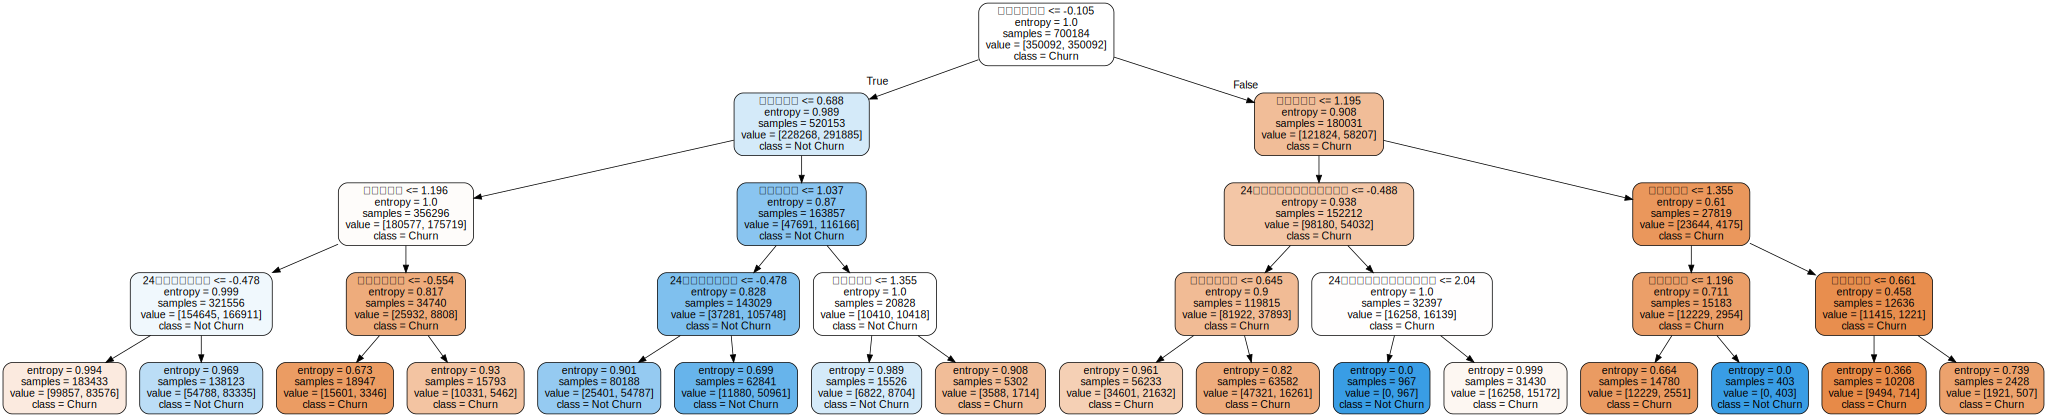

In [227]:
graph

### 随机森林

In [133]:
over_y_test.shape

(300992,)

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier()                                     # 建立随机森林分类器
rfc.fit(over_samples_x,over_samples_y)                                # 训练随机森林模型
rf_y_prob = rfc.predict_proba(over_x_test)[:,1]                       # 预测1类的概率
rf_y_pred=rfc.predict(over_x_test)                                    # 模型对测试集的预测结果
fpr_rfc,tpr_rfc,threshold_rfc = metrics.roc_curve(over_y_test,rf_y_prob)   # 获取真阳率、伪阳率、阈值  
auc_rfc = metrics.auc(fpr_rfc,tpr_rfc)                             # AUC得分
score_rfc = metrics.accuracy_score(over_y_test,rf_y_pred)                  # 模型准确率
print([score_rfc,auc_rfc])

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[0.8634415532638742, 0.9391683453013124]


In [135]:
print(classification_report(over_y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87    150496
           1       0.91      0.80      0.85    150496

    accuracy                           0.86    300992
   macro avg       0.87      0.86      0.86    300992
weighted avg       0.87      0.86      0.86    300992



## 模型比较

Text(0.5, 0, 'fpr')

Text(0, 0.5, 'tpr')

<function matplotlib.pyplot.show(*args, **kw)>

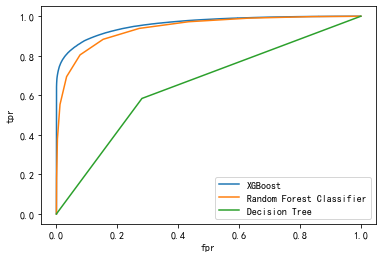

In [228]:
plt.plot(fpr_xgb,tpr_xgb,label='XGBoost')
plt.plot(fpr_rfc,tpr_rfc,label='Random Forest Classifier')
plt.plot(fpr_clf,tpr_clf,label='Decision Tree')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show

# 聚类确定用户画像

## 方法一

### 甄选用户行为字段进行聚类

In [152]:
customer_behavior = ['24小时内是否访问订单填写页','近1年用户历史订单数','决策行为',
                 '用户偏好价格','客户价值','用户一年内取消订单率', '24小时内登陆时长',
                 '用户一年内取消订单数','星级偏好','消费能力指数','价格敏感指数',
                 '24小时历史浏览酒店客户评分均值','一年内距离上次下单时长', 
                 '一年内距上次访问时长', '用户转化率','年访问次数', '访问时间点','是否为新访用户','提前预定天数']

df_up1 = xtrain[customer_behavior]
df_up1.shape

df_up2 = xtest[customer_behavior]
df_up2.shape

(482961, 19)

(206984, 19)

In [153]:
df_userportrait = pd.concat([df_up1,df_up2])

In [144]:
from sklearn.cluster import KMeans

### K-Means算法聚类

In [186]:
Kmodel = KMeans(n_clusters=3,random_state=100)
Kmodel.fit(df_userportrait)
k_char = Kmodel.cluster_centers_
k_char
clusters = pd.DataFrame(k_char.T,index=customer_behavior,columns=['0类','1类','2类'])  
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

array([[ 0.10763256, -0.51498164, -0.30277899, -0.59503924, -0.44534657,
        -0.54381937, -0.00753293, -0.3509627 , -1.10442732, -0.9004727 ,
        -0.61883943, -0.23139592, -0.51023613,  0.03318449, -0.66235732,
         0.0268472 , -0.03245447,  0.30427958,  0.03009363],
       [-0.06645482,  2.19292333,  0.31135914,  0.6296662 ,  1.96953207,
         0.70617824,  0.03956398,  2.04688412,  0.88676495,  0.90306956,
         0.37317911,  0.41440476, -0.28661916, -0.27938716,  0.71741966,
         0.13872563, -0.0091234 , -0.20200195, -0.19536926],
       [-0.0619054 , -0.05536344,  0.15695543,  0.30504093, -0.05990248,
         0.25179134, -0.00261099, -0.14366712,  0.61805969,  0.46892486,
         0.36845538,  0.08788702,  0.42048787,  0.03066741,  0.33392722,
        -0.04262192,  0.02315572, -0.17884773,  0.01717095]])

,0类,1类,2类
24小时内是否访问订单填写页,0.107633,-0.066455,-0.061905
近1年用户历史订单数,-0.514982,2.192923,-0.055363
决策行为,-0.302779,0.311359,0.156955
用户偏好价格,-0.595039,0.629666,0.305041
客户价值,-0.445347,1.969532,-0.059902
用户一年内取消订单率,-0.543819,0.706178,0.251791
24小时内登陆时长,-0.007533,0.039564,-0.002611
用户一年内取消订单数,-0.350963,2.046884,-0.143667
星级偏好,-1.104427,0.886765,0.618060
消费能力指数,-0.900473,0.903070,0.468925


### RFM用户价值评估

#### 确定代表性字段并对每一类进行分析

,Recency,Frequency,Monetary
0类,-0.510236,-0.514982,-0.445347
1类,-0.286619,2.192923,1.969532
2类,0.420488,-0.055363,-0.059902


<Figure size 1080x720 with 0 Axes>

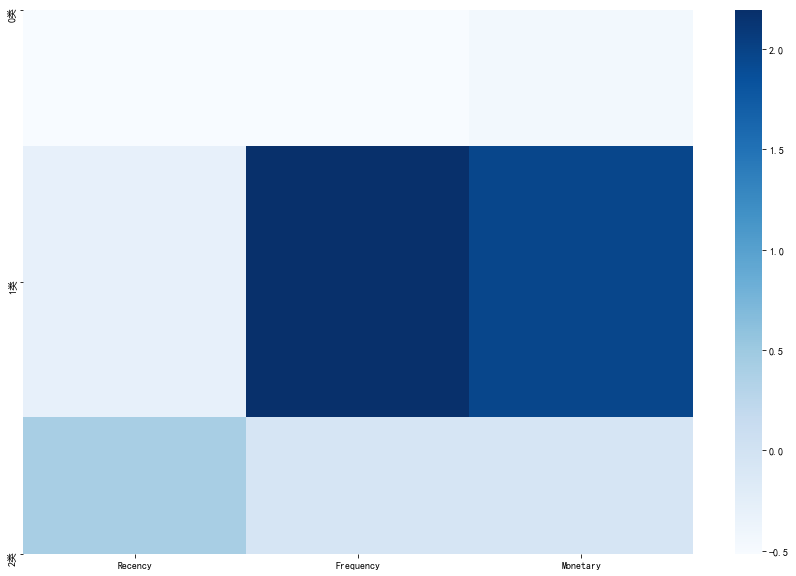

In [229]:
RFM = clusters.T[['一年内距离上次下单时长','近1年用户历史订单数','客户价值']]
RFM.columns = ['Recency','Frequency','Monetary']
RFM
plt.figure(figsize=(15,10))
sns.heatmap(RFM,cmap='Blues')

In [230]:
cluster_dic = {'0类':'低价值用户','1类':'高价值用户','2类':'中等价值客户'}
clusters.columns = clusters.columns.map(cluster_dic)

In [231]:
clusters

,低价值用户,高价值用户,中等价值的待流失客户
24小时内是否访问订单填写页,0.107633,-0.066455,-0.061905
近1年用户历史订单数,-0.514982,2.192923,-0.055363
决策行为,-0.302779,0.311359,0.156955
用户偏好价格,-0.595039,0.629666,0.305041
客户价值,-0.445347,1.969532,-0.059902
用户一年内取消订单率,-0.543819,0.706178,0.251791
24小时内登陆时长,-0.007533,0.039564,-0.002611
用户一年内取消订单数,-0.350963,2.046884,-0.143667
星级偏好,-1.104427,0.886765,0.618060
消费能力指数,-0.900473,0.903070,0.468925


#### 绘制饼图，对每类用户数量进行对比

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20b4c76ce48>)

([<matplotlib.patches.Wedge at 0x20bd5613a48>,
 [Text(0.41989357673948796, 1.016705160906012, '低价值用户'),
  Text(-0.9821178541089933, 0.49542357699280565, '高价值用户'),
  Text(-0.08301328732386615, -1.0968631610769346, '中等价值客户')],
 [Text(0.28629107504965084, 0.6932080642540991, '37.53%'),
  Text(-0.669625809619768, 0.3377888024950947, '10.06%'),
  Text(-0.05659996862990874, -0.747861246188819, '52.40%')])

([<matplotlib.patches.Wedge at 0x20bd5625b88>],
 [Text(-0.66, 8.082668874372532e-17, '')])

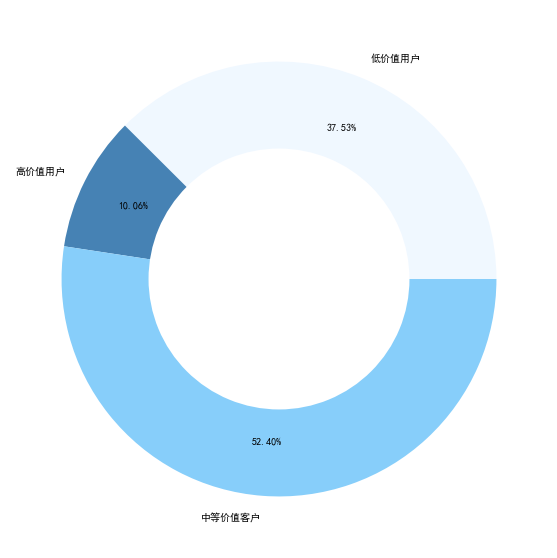

In [234]:
class_k=list(Kmodel.labels_)
percent=[class_k.count(0)/len(df_userportrait),class_k.count(1)/len(df_userportrait),class_k.count(2)/len(df_userportrait)]  
plt.subplots(figsize=(10,10))
colors=['aliceblue','steelblue','lightskyblue']
types=['低价值用户','高价值用户','中等价值客户']
plt.pie(percent,radius=1,autopct='%.2f%%',pctdistance=0.75,colors=colors,labels=types)
plt.pie([1], radius=0.6,colors='w')
plt.show()

##  方法二

In [115]:
customer_behavior = ['24小时内是否访问订单填写页','用户年订单数','决策行为',
                 '用户偏好价格','客户价值','用户一年内取消订单率', '24小时内登陆时长',
                 '用户一年内取消订单数','星级偏好','消费能力指数','价格敏感指数',
                 '24小时历史浏览酒店客户评分均值','一年内距离上次下单时长', 
                 '一年内距上次访问时长', '用户转化率','年访问次数', '访问时间点',
                     '提前预定天数']

df_up1 = xtrain[customer_behavior]
df_up1.shape

df_up2 = xtest[customer_behavior]
df_up2.shape

(482961, 18)

(206984, 18)

In [116]:
df_userportrait = pd.concat([df_up1,df_up2])

### 选择RFM字段

In [117]:
data = df_userportrait[['一年内距离上次下单时长','用户年订单数', '客户价值']]
data.head()

,一年内距离上次下单时长,用户年订单数,客户价值
0,-0.212653,-0.498229,-0.413627
1,-0.603313,-0.577902,-0.478192
2,0.165706,-0.338882,-0.361723
3,-0.603313,-0.577902,-0.478192
4,-0.548715,-0.099863,-0.376250


In [123]:
data.columns = ['R','F','M']
data.head()

,R,F,M
0,-0.212653,-0.498229,-0.413627
1,-0.603313,-0.577902,-0.478192
2,0.165706,-0.338882,-0.361723
3,-0.603313,-0.577902,-0.478192
4,-0.548715,-0.099863,-0.376250


In [124]:
from sklearn.cluster import KMeans

### 聚类

In [125]:
def distEclud(vecA,vecB):
    return np.sum(np.power(vecA-vecB,2))  # 定义残差平方和

def kmeans_clusters(data_train):
    data_train = data_train.values
    nums = range(2,11)
    SSE = []
    for num in nums:
        sse=0
        model = KMeans(n_clusters=num)
        model.fit(data_train)
        # 输出簇的中心（质心）
        center = model.cluster_centers_
        # 每个样本属于的簇的序号列表
        cluster_list = model.labels_.tolist()
        # 计算残差平方和
        for index in range(len(data)):
            cluster_num = cluster_list[index]
            sse+=distEclud(data_train[index,:],center[cluster_num])
        print('簇数',num,'SSE是',sse)
        SSE.append(sse)
    return nums,SSE

In [127]:
nums,SSE = kmeans_clusters(data)

簇数 2 SSE是 1283815.7755997346
簇数 3 SSE是 754134.8415591341
簇数 4 SSE是 565694.1608012171
簇数 5 SSE是 448142.73032551253
簇数 6 SSE是 368945.918661167
簇数 7 SSE是 306243.1090675514
簇数 8 SSE是 272254.01208073937
簇数 9 SSE是 242011.8021247203
簇数 10 SSE是 220241.01400373908


### 绘制误差曲线来确定簇数

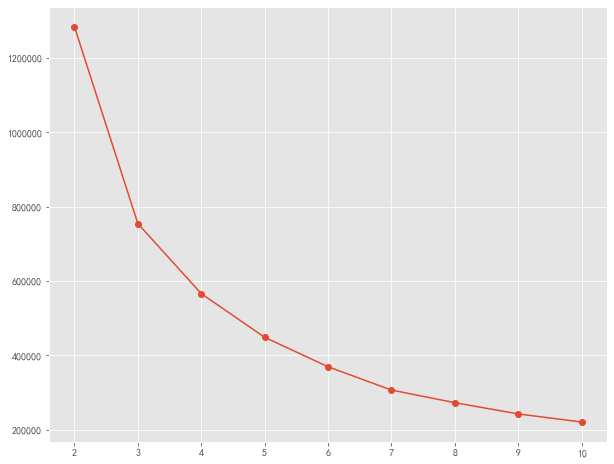

In [128]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker='o')
plt.show()

In [131]:
kmodel = KMeans(n_clusters=5)
kmodel.fit(data)
kmodel.cluster_centers_ 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([[-0.27862955,  2.13456565,  4.25827487],
       [-0.39557695, -0.42428435, -0.38272733],
       [ 2.24031129, -0.29145983, -0.18663037],
       [-0.42957619,  3.44306098,  0.80180209],
       [-0.1479538 ,  0.68828676,  0.59133219]])

In [132]:
r1 = pd.Series(kmodel.labels_).value_counts()
r1

1    437502
4    112440
2     92266
3     24670
0     23067
dtype: int64

In [133]:
# 找到聚类中心
r2 = pd.DataFrame(kmodel.cluster_centers_)
r2

,0,1,2
0,-0.278630,2.134566,4.258275
1,-0.395577,-0.424284,-0.382727
2,2.240311,-0.291460,-0.186630
3,-0.429576,3.443061,0.801802
4,-0.147954,0.688287,0.591332


In [134]:
# 拼接r1 r2  
r = pd.concat([r2,r1],axis=1)
r

,0,1,2,0
0,-0.278630,2.134566,4.258275,23067
1,-0.395577,-0.424284,-0.382727,437502
2,2.240311,-0.291460,-0.186630,92266
3,-0.429576,3.443061,0.801802,24670
4,-0.147954,0.688287,0.591332,112440


In [136]:
r.columns = list(data.columns)+[u'类别数目']
r

,R,F,M,类别数目
0,-0.278630,2.134566,4.258275,23067
1,-0.395577,-0.424284,-0.382727,437502
2,2.240311,-0.291460,-0.186630,92266
3,-0.429576,3.443061,0.801802,24670
4,-0.147954,0.688287,0.591332,112440


### RFM雷达图

(<a list of 8 Line2D ticklines objects>,
 <a list of 4 Text major ticklabel objects>)

(-0.5295761858584495, 4.358274869166206)

Text(0.5, 1.05, '客户群特征分析图')

(<a list of 8 Line2D ticklines objects>,
 <a list of 4 Text major ticklabel objects>)

(-0.5295761858584495, 4.358274869166206)

Text(0.5, 1.05, '客户群特征分析图')

(<a list of 8 Line2D ticklines objects>,
 <a list of 4 Text major ticklabel objects>)

(-0.5295761858584495, 4.358274869166206)

Text(0.5, 1.05, '客户群特征分析图')

(<a list of 8 Line2D ticklines objects>,
 <a list of 4 Text major ticklabel objects>)

(-0.5295761858584495, 4.358274869166206)

Text(0.5, 1.05, '客户群特征分析图')

(<a list of 8 Line2D ticklines objects>,
 <a list of 4 Text major ticklabel objects>)

(-0.5295761858584495, 4.358274869166206)

Text(0.5, 1.05, '客户群特征分析图')

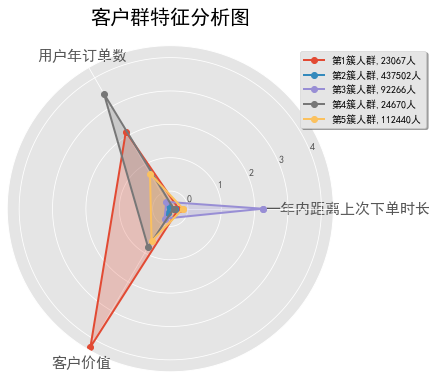

In [137]:
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
# 创建雷达图的底板
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,polar=True)

center_num = r.values  # 每个簇所对应样本数量
feature = ['一年内距离上次下单时长','用户年订单数', '客户价值']
N = len(feature)

for i,v in enumerate(center_num):
    # 设置雷达图的角度,切分
    angles = np.linspace(0,2*np.pi,N,endpoint=False)
    # 封闭雷达图
    centers = np.concatenate((v[:-1],[v[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles,centers,'o-',linewidth=2,label='第%d簇人群,%d人'%(i+1,v[-1]))
    # 填充颜色
    ax.fill(angles,centers,alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles*180/np.pi,feature,fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(r2.values.min()-0.1,r2.values.max()+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), ncol=1, fancybox=True, shadow=True)

# 显示图形
plt.show()